# 데이터 이해하기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

import statsmodels.api as sm  # 로지스틱함수
import scipy.stats as spst  # 카이제곱검정

In [2]:
path = 'train.csv'
org_data = pd.read_csv(path)
data = org_data.copy()
data.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 데이터 전처리

### 이상치 제거

In [5]:
# 변수 1~16 이상치 제거
data = data[data['LotFrontage'] < 200]
data = data[data['LotArea'] < 100000]

# 변수 33~48 이상치 제거
data = data.loc[data['BsmtFinSF1'] <= 3000].reset_index(drop=True)
data = data.loc[data['BsmtFinSF2'] < 1400].reset_index(drop=True)
data = data.loc[data['BsmtUnfSF'] < 2300].reset_index(drop=True)
data = data.loc[data['TotalBsmtSF'] < 3000].reset_index(drop=True)
data = data.loc[data['1stFlrSF'] < 2898].reset_index(drop=True)
data = data.loc[data['2ndFlrSF'] < 2000].reset_index(drop=True)
data = data.loc[data['GrLivArea'] < 4000].reset_index(drop=True)

# 변수 49~64 이상치 제거하기
data = data[data['BedroomAbvGr']!=8]
data = data[data['KitchenAbvGr']!=0]
data = data[data['Functional']!='Sev']

# 변수 65~80 이상치 제거
data = data[data['WoodDeckSF']<800]
data = data[data['OpenPorchSF']<500]
data = data[data['EnclosedPorch']<500]
data = data[data['3SsnPorch']<500]
data = data[data['3SsnPorch']<16000].reset_index(drop=True)

### x와 y 분리

In [6]:
target = 'SalePrice'

x = data.drop(target, axis=1)
y = data[target]

### 변수 1~16 전처리

In [7]:
# NaN 조치
fre_D = x['LotFrontage'].value_counts().idxmax()  # 최빈값
x['LotFrontage'].fillna(fre_D, inplace=True)

# # 이상치 제거
# data = data[data['LotFrontage'] < 200]
# data = data[data['LotArea'] < 100000]

# 열 제거 : nan값 비중 매우 높음
x = x.drop('Alley', axis=1)
x = x.drop('Utilities', axis=1)

### 변수 17~32 전처리

In [8]:
# NaN 조치
x['MasVnrArea'].fillna(0, inplace=True)
x['MasVnrType'].fillna('None', inplace=True)
x['BsmtQual'].fillna('Na', inplace=True)
x['BsmtCond'].fillna('Na', inplace=True)
x['BsmtExposure'].fillna('Na', inplace=True)

### 변수 33~48 전처리

In [9]:
# NaN 조치
## No basement라는 의미로 NA로 채움
x['BsmtFinType1'].fillna("NA", inplace = True)
x['BsmtFinType2'].fillna("NA", inplace = True)

## 최빈값으로 채움
x['Electrical'].fillna(x['Electrical'].mode()[0], inplace = True)

# # 이상치 제거
# data = data.loc[data['BsmtFinSF1'] <= 3000].reset_index(drop=True)
# data = data.loc[data['BsmtFinSF2'] < 1400].reset_index(drop=True)
# data = data.loc[data['BsmtUnfSF'] < 2300].reset_index(drop=True)
# data = data.loc[data['TotalBsmtSF'] < 3000].reset_index(drop=True)
# data = data.loc[data['1stFlrSF'] < 2898].reset_index(drop=True)
# data = data.loc[data['2ndFlrSF'] < 2000].reset_index(drop=True)
# data = data.loc[data['GrLivArea'] < 4000].reset_index(drop=True)

### 변수 49~64 전처리

In [10]:
# 결측치 채워주기
x['FireplaceQu'].fillna('No', inplace=True)
x['GarageType'].fillna('No', inplace=True)
x['GarageYrBlt'].fillna(0, inplace=True)
x['GarageFinish'].fillna('No', inplace=True)
x['GarageQual'].fillna('No', inplace=True)
x['GarageCond'].fillna('No', inplace=True)

# # 이상치 제거하기
# data = data[data['BedroomAbvGr']!=8]
# data = data[data['KitchenAbvGr']!=0]
# data = data[data['Functional']!='Sev']

### 변수 65~80 전처리

In [11]:
# NA(없음) -> 'NO'로 결측치 채우기
x['PoolQC'].fillna('NO', inplace=True)
x['Fence'].fillna('NO', inplace=True)
x['MiscFeature'].fillna('NO', inplace=True)

# # 이상치 제거
# data = data[data['WoodDeckSF']<800]
# data = data[data['OpenPorchSF']<500]
# data = data[data['EnclosedPorch']<500]
# data = data[data['3SsnPorch']<500]
# data = data[data['3SsnPorch']<16000].reset_index(drop=True)

In [12]:
# 확인
x.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1181,1459,20,RL,68.0,9717,Pave,Reg,Lvl,Inside,Gtl,...,0,0,NO,NO,NO,0,4,2010,WD,Normal
1182,1460,20,RL,75.0,9937,Pave,Reg,Lvl,Inside,Gtl,...,0,0,NO,NO,NO,0,6,2008,WD,Normal


In [13]:
len(x)

1183

### 변수 1~16 추가분석 전처리

In [14]:
import warnings
warnings.filterwarnings(action='ignore')

In [15]:
## <전처리 열변경>
# (1) MSSubClass
# 집값에 영향을 줄 요인 별로 묶어 구분
# new = 1946년 이후 건설 , older = 1945년 이전 ,
# split = 엇층, 엇계단, unf = 미완성 , other = 나머지
x['MSSubClass'].loc[x['MSSubClass'].isin([20,60,120])] = 'new'
x['MSSubClass'].loc[x['MSSubClass'].isin([30,70,160])] = 'older'
x['MSSubClass'].loc[x['MSSubClass'].isin([40,45])] = 'unf'
x['MSSubClass'].loc[x['MSSubClass'].isin([80,85,180])] = 'split'
x['MSSubClass'].loc[x['MSSubClass'].isin([50,75,90,150,190])] = 'other'

# (2) LotShape
# reg: 모양을 규칙적
# ir: 불규칙적으로 구분
x['LotShape'].loc[x.LotShape == 'Reg'] = 'reg'
x['LotShape'].loc[x['LotShape'].isin(['IR1','IR2','IR3'])] = 'ir'

# (3) LandSlope
# Gtl: 경사 무 (평지)
# ste: 경사 유
x['LandSlope'].loc[x.LotShape == 'Gtl'] = 'Gtl'
x['LandSlope'].loc[x['LandSlope'].isin(['Sev','Mod'])] = 'ste'

# (4) Condition1
# Norm : norm 일반적
# pos : 긍정적 주변 환경
# nag : 부정적 주변 환경
x['Condition1'].loc[x.LotShape == 'Norm'] = 'Norm'
x['Condition1'].loc[x['Condition1'].isin(['PosN','PosA'])] = 'pos'
x['Condition1'].loc[x['Condition1']\
                       .isin(['Feedr','Artery','RRAe','RRNn','RRAn','RRNe'])] = 'nag'

# (5) Condition1
# sto1 : 1층
# sto2 : 2층이상
# unf : 미완성
x['HouseStyle'].loc[x['HouseStyle'].isin(['1Story','1.5Fin'])] = 'sto1'
x['HouseStyle'].loc[x['HouseStyle'].isin(['2Story','SFoyer','SLvl','2.5Fin'])] = 'sto2'
x['HouseStyle'].loc[x['HouseStyle'].isin(['2.5Unf','1.5Unf'])] = 'unf'

### 변수 17~32 추가분석 전처리

In [16]:
## 'RoofStyle'
# 3프로 미만인 종류들을 다 합침.
#(flat, gambrel, mansard, shed)
# 기준 - 박스 플롯 분포, 데이터수, y값과의 유니크별 평균 확인
x['RoofStyle'] = x['RoofStyle']\
.map({'Gable':'Gable', 'Hip':'Hip', 'Flat':'Others',
      'Gambrel':'Others', 'Mansard':'Others','Shed':'Others'})

## 'RoofMatl'
# 3프로 미만인 종류들을 다 합침.
#(WdShngl,WdShake는 나무재질, 나머지는 Others)
# 기준 - 박스 플롯 분포, 데이터수, y값과의 유니크별 평균 확인
x['RoofMatl'] = x['RoofMatl']\
.map({'CompShg':'CompShg', 'WdShngl':'Wood','WdShake':'Wood', 'Metal':'Others',
      'Membran':'Others','Tar&Grv':'Others', 'Roll':'Others','ClyTile':'Others'})

## 'Exterior1st'
# 수정된 고유값들
# Wood(나무류) : Wd Sdng,WdShing
# Panull(합판류) : Plywood, CemntBd
# Brick(벽돌류) : BrkComm, BrkFace, CBlock, Stone
# Shn(널판지) : AsphShn, AsbShng
# Stucco(치장벽토) : ImStucc, Stucco
x['Exterior1st'] = x['Exterior1st']\
.map({'VinylSd':'VinylSd', 'HdBoard':'HdBoard','MetalSd':'MetalSd','Wd Sdng':'Wood',
      'WdShing':'Wood','Plywood':'Panull', 'CemntBd':'Panull','BrkComm':'Brick',
      'BrkFace':'Brick','CBlock':'Brick','Stone':'Brick','AsphShn':'Shn',
      'AsbShng':'Shn','ImStucc':'Stucco','Stucco':'Stucco'})

## 'Exterior2nd' (1이랑 헷갈리면 안됨. 고유값이 다른 것들이 있음)
# 수정된 고유값들 ('Other' 값은 치장벽토와 값이 유사하여 합침)
# Wood(나무류) : Wd Shng , Wd Sdng
# Panull(합판류) : Plywood , CmentBd
# Brick(벽돌류), BrkFace, Brk Cmn, Stone, CBlock
# Stucco(치장벽토) : Stucco, ImStucc, Other
# Shn(널판지) : AsbShng, AsphShn
x['Exterior2nd'] = x['Exterior2nd']\
.map({'VinylSd':'VinylSd', 'HdBoard':'HdBoard','MetalSd':'MetalSd',
      'Wd Sdng':'Wood', 'Wd Shng':'Wood','Plywood':'Panull',
      'CmentBd':'Panull','Brk Cmn':'Brick','BrkFace':'Brick',
      'CBlock':'Brick','Stone':'Brick','AsphShn':'Shn','AsbShng':'Shn',
      'ImStucc':'Stucco','Stucco':'Stucco','Other':'Stucco'})

# 지어진 년도: 1800 후반, ~1950, ~2000, 2000~
bin = [-np.inf, 1900, 1951, 2001, np.inf]
label = ['1800 후반', '~1950', '~2000', '2000~']
x['YearBuilt_grp'] = pd.cut(x['YearBuilt'], bins=bin, right=False, labels=label)
# 기존 변수 제거
data.drop('YearBuilt', axis=1, inplace=True)

# 리모델링 년도: ~1950, ~2000, 2000~
bin = [-np.inf, 1951, 2001, np.inf]
label = ['~1950', '~2000', '2000~']
x['YearRemodAdd_grp'] = pd.cut(x['YearRemodAdd'], bins=bin, right=False, labels=label)
# 기존 변수 제거
x.drop('YearRemodAdd', axis=1, inplace=True)

### 변수 33~48 추가분석 전처리

In [17]:
# BsmtFinSF1_grp
bins = [-np.inf, 1, 500, 1000, 1500, np.inf]
labels = ['없음', '500미만', '1000미만', '1500미만', '1500이상']
x['BsmtFinSF1_grp'] = pd.cut(x['BsmtFinSF1'], bins, labels=labels, right=False)

# BsmtUnfSF_grp
bins = [-np.inf, 1, 500, 1000, 1500, 2000, np.inf]
labels = ['없음', '500미만', '1000미만', '1500미만', '2000미만', '2000이상']
x['BsmtUnfSF_grp'] = pd.cut(x['BsmtUnfSF'], bins, labels=labels, right=False)

### 변수 49~64 추가분석 전처리

In [18]:
# KitchenAbvGr
# 2개 이상의 데이터 적기 때문에 하나로 합쳐줌
x['KitchenAbvGr'] = x['KitchenAbvGr'].map({ 1:'1개', 2:'2개 이상', 3:'2개 이상'})

# TotRmsAbvGrd
# 개수가 굉장히 적은 데이터 있기 때문에 합쳐줌
bin = [1, 5, 9, np.inf]
label = ['~4', '5~8', '9~']
x['TotRmsAbvGrd'] = pd.cut(x['TotRmsAbvGrd'], bins=bin, labels=label, right=False)

# Functional
# 희소한 데이터들을 의미상 합쳐줌
# Min : 마이너한 공제
# Maj : 메이저한 공제
# Typ : 일반적인 공제
x['Functional'] = x['Functional']\
.map({'Min1':'Min', 'Min2':'Min', 'Maj1':'Maj', 'Maj2':'Maj', 'Mod':'Typ','Typ':'Typ'})

# GarageType
# 희소한 데이터들을 의미상 합쳐줌
# 나머지 적은 데이터들 Others로 합쳐줌
# At : 집에 붙어있는
# Dt : 집에서 떨어져있는
# Others : 다른 유형들
# No : 차고 없는 데이터
x['GarageType'] = x['GarageType']\
.map({'Attchd':'At', 'Detchd':'Dt', 'BuiltIn':'Others', 'CarPort':'Others',
      'Basment':'Others', '2Types':'Others', 'No':'No'})

# GarageYrBlt
# 범주형 데이터로 판별하여 10년대씩 연도별로 묶어서 분석
bin = [-np.inf, 1, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, np.inf]
label = ['No', '1900년대', '1910년대', '1920년대', '1930년대',
         '1940년대', '1950년대', '1960년대', '1970년대', '1980년대', '1990년대', '2000년대']
x['GarageYrBlt'] = pd.cut(x['GarageYrBlt'], bins=bin, labels=label, right=False)

# GarageCond
# 희소한 데이터들 의미상 합쳐줌
# GarageQual 데이터와 유사데이터
# Gd : 좋은, Po : 나쁜, TA : 일반적, No : 차고 없음
x['GarageCond'] = x['GarageCond']\
.map({'TA':'TA', 'No':'No', 'Ex':'Gd','Gd':'Gd','Fa':'Po','Po':'Po'})

In [19]:
x['GarageType'].unique()

array(['At', 'Dt', 'Others', 'No'], dtype=object)

### 변수 65~80 추가분석 전처리

In [20]:
# WoodDeckSF_cut 숫자형 데이터를 그룹으로
bin = [-np.inf, 1, 200, np.inf]
label = ['No', '200미만', '200이상']
x['WoodDeckSF_cut'] = pd.cut(x['WoodDeckSF'], bins=bin, labels=label, right=False)

# OpenPorchSF_cut 숫자형 데이터를 그룹으로
bin = [-np.inf, 1, 100, np.inf]
label = ['No', '100미만', '100이상']
x['OpenPorchSF_cut'] = pd.cut(x['OpenPorchSF'], bins=bin, labels=label, right=False)

# EnclosedPorch_cut 숫자형 데이터를 그룹으로
bin = [-np.inf, 1, 100, 200, 300, np.inf]
label = ['No', '100미만', '200미만', '300미만', '300이상']
x['EnclosedPorch_cut'] = pd.cut(x['EnclosedPorch'], bins=bin, labels=label, right=False)

- 모든 열 보기

In [21]:
pd.set_option('display.max_columns', 85)

In [22]:
x.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,YearBuilt_grp,YearRemodAdd_grp,BsmtFinSF1_grp,BsmtUnfSF_grp,WoodDeckSF_cut,OpenPorchSF_cut,EnclosedPorch_cut
1181,1459,new,RL,68.0,9717,Pave,reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,sto1,5,6,1950,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1개,Gd,5~8,Typ,0,No,At,1950년대,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NO,NO,NO,0,4,2010,WD,Normal,~1950,~2000,500미만,없음,200이상,No,200미만
1182,1460,new,RL,75.0,9937,Pave,reg,Lvl,Inside,Gtl,Edwards,Norm,Norm,1Fam,sto1,5,6,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1개,TA,5~8,Typ,0,No,At,1960년대,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NO,NO,NO,0,6,2008,WD,Normal,~2000,~2000,1000미만,500미만,200이상,100미만,No


- 모든 행 보기

In [23]:
pd.set_option('display.max_rows', 1436)

In [24]:
x.isna().sum()

Id                   0
MSSubClass           0
MSZoning             0
LotFrontage          0
LotArea              0
Street               0
LotShape             0
LandContour          0
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
YearBuilt            0
RoofStyle            0
RoofMatl             0
Exterior1st          0
Exterior2nd          0
MasVnrType           0
MasVnrArea           0
ExterQual            0
ExterCond            0
Foundation           0
BsmtQual             0
BsmtCond             0
BsmtExposure         0
BsmtFinType1         0
BsmtFinSF1           0
BsmtFinType2         0
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
Heating              0
HeatingQC            0
CentralAir           0
Electrical           0
1stFlrSF             0
2ndFlrSF             0
LowQualFinSF         0
GrLivArea  

### 이변량 분석을 바탕으로 변수 제거

#### 상관계수, p-value, t / f통계량를 통해 제거할 변수들 선별

In [25]:
cols = ['Street', 'LandSlope', 'Condition2', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF',
        '3SsnPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold']
x.drop(cols, axis=1, inplace=True)

### 다중공선성 파악하기

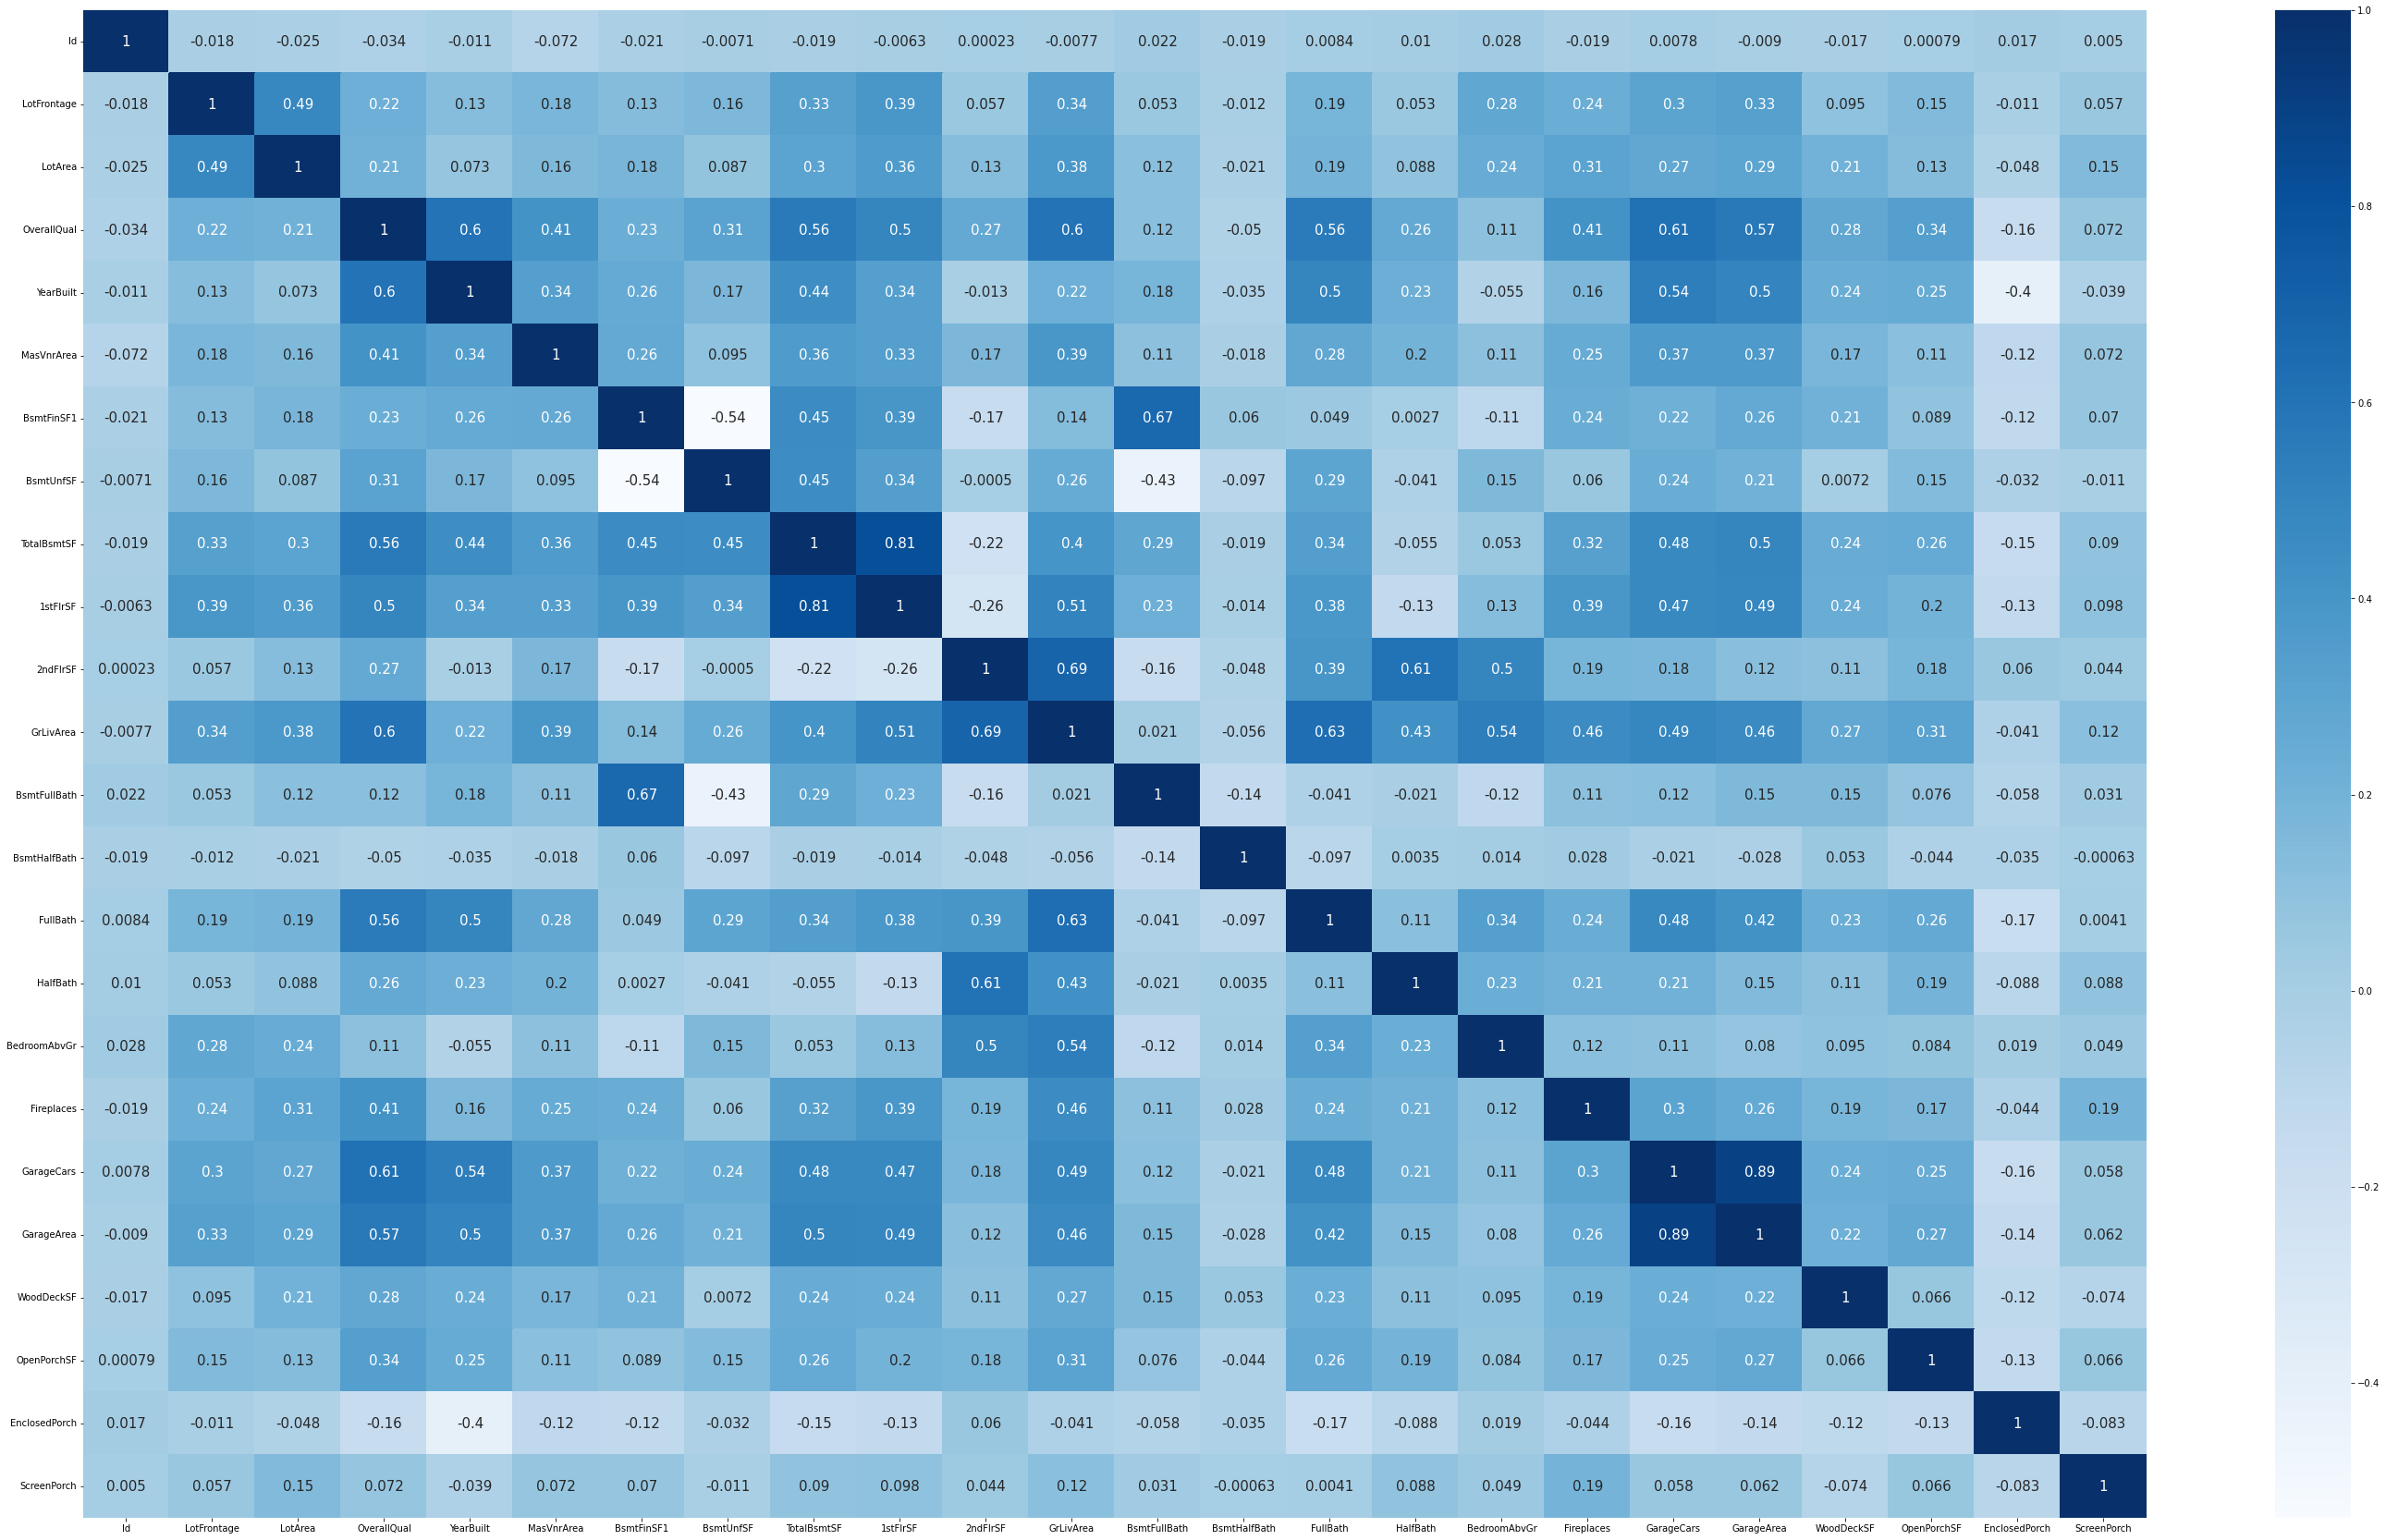

In [26]:
plt.figure(figsize=(50, 30))
sns.heatmap(x.corr(), annot=True, annot_kws={'size': 15}, cmap='Blues')
plt.show()

- feature들 간 약 0.7 이상일 경우 다중공선성 문제가 있는 것으로 보고 해당 feature들 중 타켓과 상관계수가 낮은 feature를 삭제
    - 1stFlrSF & TotalBsmtSF : 0.8 -> 1stFlrSF 삭제
    - GrLivArea & 2ndFlrSF : 0.69 -> 2ndFlrSF 삭제
    - GarageCars & GarageArea의 경우 0.89로 확인되지만 범주형 vs 연속형임으로 다중공선성을 파악할 수 없기때문에 삭제하지 않는다.

#### VIF(Variance Inflation Factors)를 통한 검정

In [27]:
# !pip install statsmodels

In [28]:
# VIF(Variance Inflation Factors) 사용을 위한 라이브러리 불러오기
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
# dmatrices()에 사용하기 위해 숫자로 시작하는 변수 1stFlrSF와 2ndFlrSF 변수명 재설정
x.rename(columns={'1stFlrSF':'firstFlrSF', '2ndFlrSF':'secondFlrSF'}, inplace=True)

In [30]:
# VIF(Variance Inflation Factors)를 통한 검정
y, X = dmatrices('SalePrice ~ firstFlrSF + secondFlrSF + TotalBsmtSF + GrLivArea', pd.concat([x, y], join='outer', axis=1), return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i).round(2) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,13.97,Intercept
1,59.81,firstFlrSF
2,80.14,secondFlrSF
3,2.98,TotalBsmtSF
4,101.65,GrLivArea


> * VIF 결과 firstFlrSF, secondFlrSF, GrLivArea는 10이상으로 다중공선성 관계가 있는 것으로 파악
    * 따라서 세 변수 중 두 변수를 삭제
    * heatmap에서 분석한 결과와 동일하기 때문에 firstFlrSF와 secondFlrSF 삭제

In [31]:
data_n = [col for col in x.columns if x[col].dtype == 'int64' or x[col].dtype == 'float64']
len(data_n)

24

In [32]:
corrmat = x.corr()
top_corr_dict = {}

for idx, val in enumerate(data_n):
    # 약 0.7이상이면 다중공선성 문제가 있을 수 있을 것으로 파악
    top_corr_dict[val] = corrmat.index[abs(corrmat[val]) > 0.69]
                                       
    if len(top_corr_dict[val]) >= 2: # 1개는 자기 자신
        print('기준 열 :', data_n[idx])
        print(corrmat[val][abs(corrmat[val]) > 0.69])
        print('=' * 40)

기준 열 : TotalBsmtSF
TotalBsmtSF    1.000000
firstFlrSF     0.814613
Name: TotalBsmtSF, dtype: float64
기준 열 : firstFlrSF
TotalBsmtSF    0.814613
firstFlrSF     1.000000
Name: firstFlrSF, dtype: float64
기준 열 : secondFlrSF
secondFlrSF    1.000000
GrLivArea      0.691658
Name: secondFlrSF, dtype: float64
기준 열 : GrLivArea
secondFlrSF    0.691658
GrLivArea      1.000000
Name: GrLivArea, dtype: float64
기준 열 : GarageCars
GarageCars    1.000000
GarageArea    0.894753
Name: GarageCars, dtype: float64
기준 열 : GarageArea
GarageCars    0.894753
GarageArea    1.000000
Name: GarageArea, dtype: float64


#### 다중공선성 변수 제거

In [33]:
cols = ['firstFlrSF', 'secondFlrSF']
x.drop(cols, axis=1, inplace=True)

### 고유 변수 제거

In [34]:
x.drop('Id', axis=1, inplace=True)

In [35]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   MSSubClass         1183 non-null   object  
 1   MSZoning           1183 non-null   object  
 2   LotFrontage        1183 non-null   float64 
 3   LotArea            1183 non-null   int64   
 4   LotShape           1183 non-null   object  
 5   LandContour        1183 non-null   object  
 6   LotConfig          1183 non-null   object  
 7   Neighborhood       1183 non-null   object  
 8   Condition1         1183 non-null   object  
 9   BldgType           1183 non-null   object  
 10  HouseStyle         1183 non-null   object  
 11  OverallQual        1183 non-null   int64   
 12  YearBuilt          1183 non-null   int64   
 13  RoofStyle          1183 non-null   object  
 14  RoofMatl           1183 non-null   object  
 15  Exterior1st        1183 non-null   object  
 16  Exteri

### 가변수화

- int 또는 float타입이지만 범주형인 변수들: BsmtFullBath, BsmtHalfBath, BedroomAbvGr, Fireplaces, GarageCars
- 해당 변수들 확인 결과, 개수별로 중요도가 동일하게 증가한다고 판단하여 가변수화에서 제외한다.

In [36]:
# 가변수화 필요한 범주형 변수들
data_c = x.select_dtypes(include = ['object', 'category'])

In [37]:
cat_cols = data_c.columns
x = pd.get_dummies(x, columns=cat_cols, drop_first=True)
x.tail(1)

,LotFrontage,LotArea,OverallQual,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MSSubClass_older,MSSubClass_other,MSSubClass_split,MSSubClass_unf,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,PavedDrive_Y,PoolQC_Gd,PoolQC_NO,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NO,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YearBuilt_grp_~1950,YearBuilt_grp_~2000,YearBuilt_grp_2000~,YearRemodAdd_grp_~2000,YearRemodAdd_grp_2000~,BsmtFinSF1_grp_500미만,BsmtFinSF1_grp_1000미만,BsmtFinSF1_grp_1500미만,BsmtFinSF1_grp_1500이상,BsmtUnfSF_grp_500미만,BsmtUnfSF_grp_1000미만,BsmtUnfSF_grp_1500미만,BsmtUnfSF_grp_2000미만,BsmtUnfSF_grp_2000이상,WoodDeckSF_cut_200미만,WoodDeckSF_cut_200이상,OpenPorchSF_cut_100미만,OpenPorchSF_cut_100이상,EnclosedPorch_cut_100미만,EnclosedPorch_cut_200미만,EnclosedPorch_cut_300미만,EnclosedPorch_cut_300이상
1182,75.0,9937,5,1965,0.0,830,136,1256,1256,1,0,1,1,3,0,1,276,736,68,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0


### train, val 데이터 셋 나누기

In [38]:
# train, val 셋 나누기 위한 라이브러리 불러오기
from sklearn.model_selection import train_test_split

In [39]:
# train, val 셋으로 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2022)

### 스케일링

In [40]:
# 스케일링을 위한 라이브러리 불러오기
from sklearn.preprocessing import MinMaxScaler

In [41]:
# KNN, SVM등 정규화가 필요한 모델들을 위해 스케일링을 함
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

# 모델링

In [42]:
# 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# import lightgbm as lgb
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Linear Regression

In [43]:
# 선언하기
lr = LinearRegression()

In [44]:
# 학습하기
lr.fit(x_train, y_train)

LinearRegression()

In [45]:
# 예측하기
lr_pred = lr.predict(x_val)

In [46]:
# 평가하기
print('MSE:', mean_squared_error(y_val, lr_pred))
# print('RMSE: ', math.sqrt(mean_squared_error(y_val, y_pred)))
print('R2-Score:', r2_score(y_val, lr_pred))

MSE: 790590829.1184229
R2-Score: 0.9035740931806167


In [47]:
# y절편
print(lr.intercept_)

[-240800.27615187]


In [48]:
# 회귀계수
coe = pd.DataFrame(lr.coef_[0], list(x), columns=['coefficient'])
coe['abs_coefficient'] = abs(coe['coefficient'])
coe.sort_values(by='abs_coefficient', ascending=False).head()

,coefficient,abs_coefficient
GarageQual_Po,-105470.430033,105470.430033
GarageQual_Fa,-89302.649405,89302.649405
GarageQual_TA,-80704.296062,80704.296062
GarageQual_Gd,-63030.022486,63030.022486
MSZoning_FV,45649.641015,45649.641015


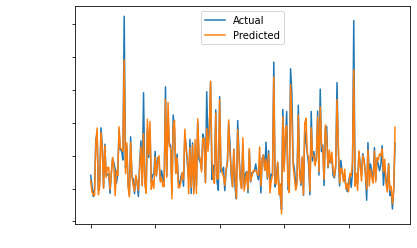

In [49]:
# 예측값, 실제값 시각화
plt.plot(y_val.values, label='Actual')
plt.plot(lr_pred, label='Predicted')
plt.legend()
plt.xticks(color='w') 
plt.yticks(color='w') 
plt.ylabel('SalePrice', color='w', size=20)
plt.show()

In [50]:
# 결과저장
result_mse = {}
result_r2 = {}
result_mse['LinearRegression'] = mean_squared_error(y_val, lr_pred)
result_r2['LinearRegression'] = r2_score(y_val, lr_pred)

## Decision Tree

In [51]:
# 선언하기 - max_depth, random_state속성을 줄 수 있음
dt = DecisionTreeRegressor(max_depth=3)

In [52]:
# 학습하기
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

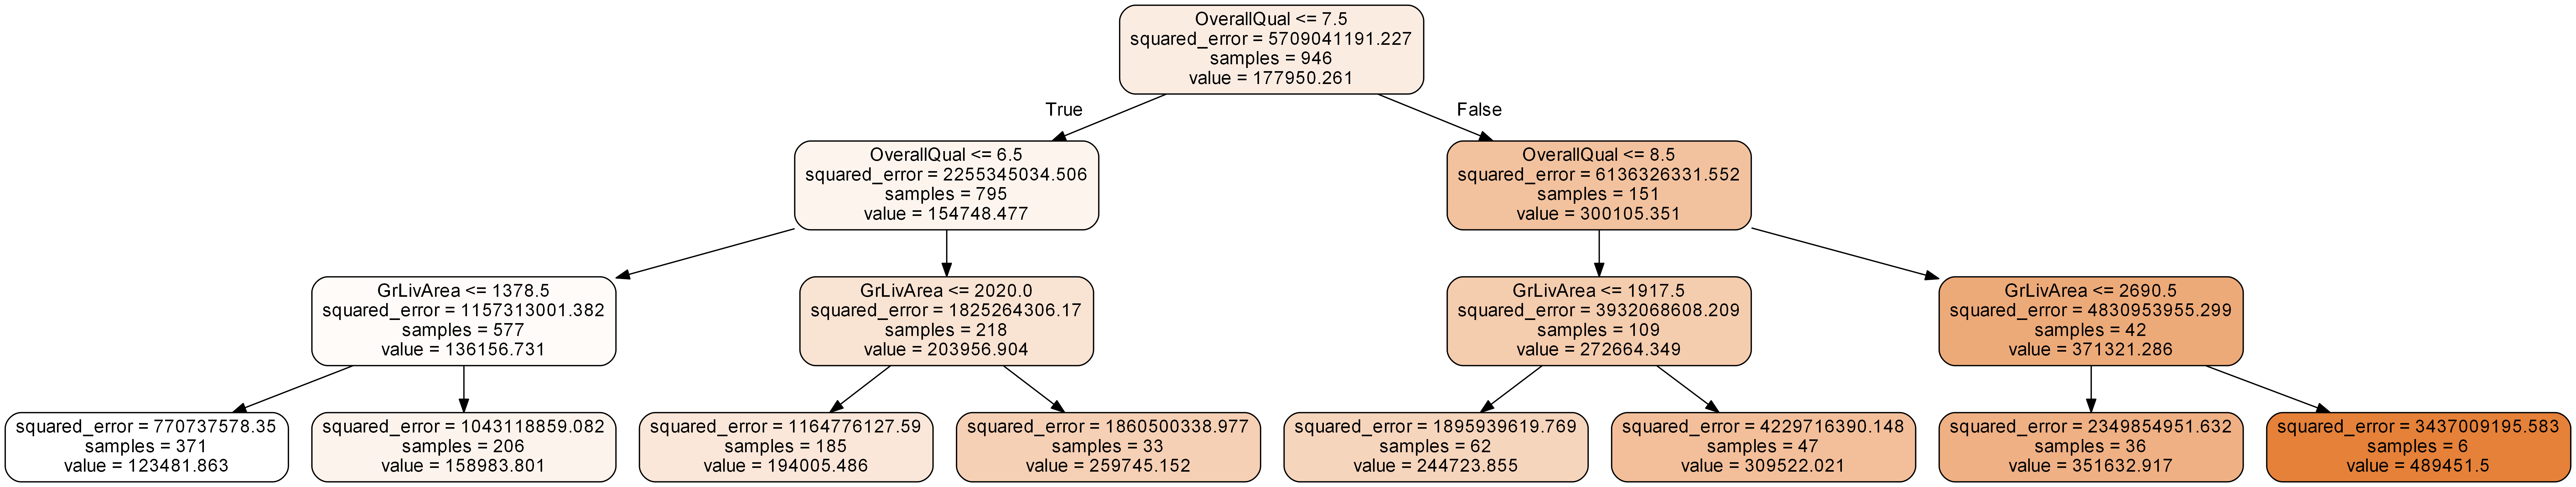

In [53]:
# 시각화
from sklearn.tree import export_graphviz

export_graphviz(dt,
               out_file = 'tree.dot',
               feature_names = x_train.columns,  # feature 이름
               rounded = True, precision = 3, filled = True)
!dot -Tpng tree.dot -o tree.png -Gdpi=300

# 이미지 파일 로딩
from IPython.display import Image
Image(filename = 'tree.png', width = 800)  # 사이즈 조정

In [54]:
train_mae, val_mae = [], []

depth = list(range(1, 20))
for d in depth:
    dt = DecisionTreeRegressor(max_depth = d)
    dt.fit(x_train, y_train)
    dt_tr_pred = dt.predict(x_train)  # train 에러 계산을 위해 x_train도 예측
    dt_pred = dt.predict(x_val)
    train_mae.append(mean_absolute_error(y_train, dt_tr_pred))
    val_mae.append(mean_absolute_error(y_val, dt_pred))
    print(d)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


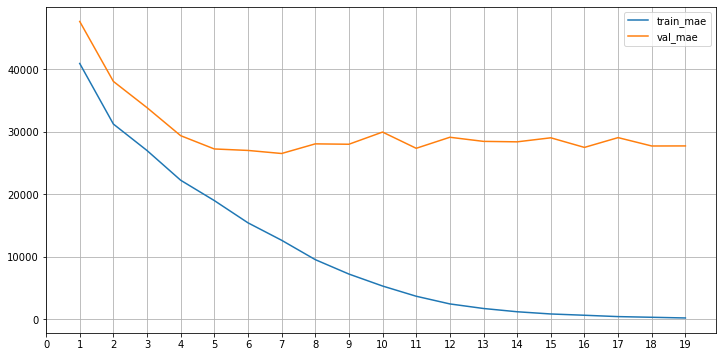

In [55]:
plt.figure(figsize = (12, 6))
plt.plot(depth, train_mae, label = 'train_mae')
plt.plot(depth, val_mae, label = 'val_mae')
plt.legend()
plt.xticks(range(20))
plt.grid()
plt.show()
# 3 정도가 적당, 이후부터는 과적합으로 판단

- max_depth를 3으로 준 상태로 시작했기때문에 별다른 튜닝을 하지 않음

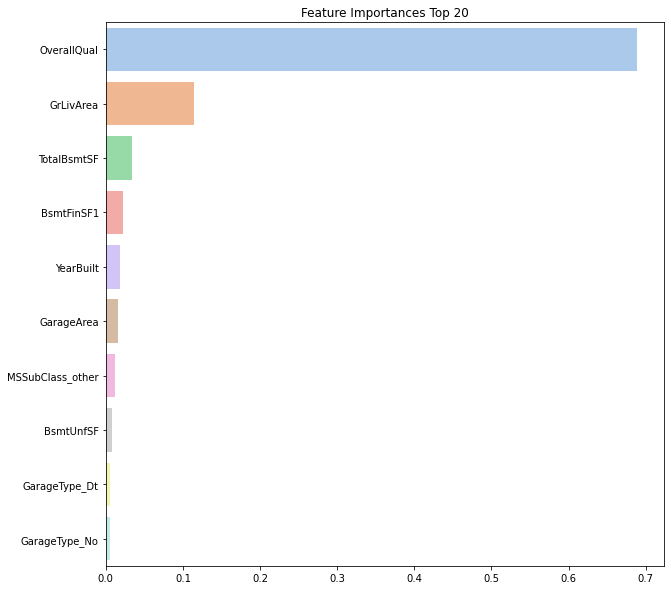

In [56]:
# 변수 중요도 시각화
import seaborn as sns

feature_importance_values = dt.feature_importances_

# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=x_train.columns)

# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=[10, 10])
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_top20, y=feature_top20.index, palette=sns.color_palette("pastel"))
plt.show()

In [57]:
# 예측
dt_pred = dt.predict(x_val)

In [58]:
# 평가
print('r2 score:', r2_score(y_val, dt_pred))
print('mse:', mean_squared_error(y_val, dt_pred))

r2 score: 0.7970852412870184
mse: 1663687204.2256272


- 사회과학(집값) 문제이므로, 일반적인 기준(0.3)에 적용해보면 유의미하다고 볼 수도 있겠다.

In [59]:
# 결과저장
result_mse['DecisionTreeRegressor'] = mean_squared_error(y_val, dt_pred)
result_r2['DecisionTreeRegressor'] = r2_score(y_val, dt_pred)

## KNN

In [60]:
# 선언하기
knn = KNeighborsRegressor()

In [61]:
# 학습하기
knn.fit(x_train_s, y_train)

KNeighborsRegressor()

In [62]:
# 예측하기
knn_pred = knn.predict(x_val_s)

In [63]:
# 평가하기
print('MSE:', mean_squared_error(y_val, knn_pred))
# print('MAE:', mean_absolute_error(y_val, y_pred))
print('R2-Score:', r2_score(y_val, knn_pred))

MSE: 1950415948.9206748
R2-Score: 0.7621138272507167


### 튜닝

In [64]:
param = {'n_neighbors': range(3, 51)}

knn_t = RandomizedSearchCV(knn,
                           param, 
                           cv=10,
                           n_iter=30, 
                           scoring='r2', 
                           n_jobs=-1)

In [65]:
# 학습하기
knn_t.fit(x_train_s, y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'n_neighbors': range(3, 51)},
                   scoring='r2')

In [66]:
# mean_test_score 확인
print(knn_t.cv_results_['mean_test_score'])
print('-'*20)

# 최적 파라미터
print('최적파라미터:', knn_t.best_params_)

# 최고 성능
print('최고성능:', knn_t.best_score_)

[0.73651941 0.75644136 0.70522796 0.75742738 0.70825256 0.7575929
 0.75559482 0.72420062 0.71824828 0.7042316  0.74276841 0.77072251
 0.7339946  0.71071326 0.76291991 0.74159468 0.72771281 0.7165661
 0.70956332 0.70695703 0.75213769 0.76110652 0.74056389 0.74841572
 0.76520684 0.73346346 0.7499527  0.72166133 0.75865496 0.72921297]
--------------------
최적파라미터: {'n_neighbors': 5}
최고성능: 0.7707225102461488


### 튜닝2

In [67]:
# 변수 선언
param = {'n_neighbors': range(3, 10),
         'leaf_size': range(5, 35)}

# 선언하기
knn_t2 = GridSearchCV(knn,
                     param,
                     cv=5,
                     n_jobs=-1)

In [68]:
# 학습하기
knn_t2.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': range(5, 35),
                         'n_neighbors': range(3, 10)})

In [69]:
# 선택된 파라미터와 서능
print(knn_t2.best_params_)
print(knn_t2.best_score_)

{'leaf_size': 5, 'n_neighbors': 5}
0.7744060469559926


In [70]:
# 예측하기
knn_pred2 = knn_t2.predict(x_val_s)

In [71]:
# 평가하기
print('MSE:',mean_squared_error(y_val, knn_pred2))
print('R2-Score:', r2_score(y_val, knn_pred2))

MSE: 1950415948.9206748
R2-Score: 0.7621138272507167


In [72]:
# 결과저장
result_mse['KNN'] = mean_squared_error(y_val, knn_pred2)
result_r2['KNN'] = r2_score(y_val, knn_pred2)

## SVM

In [73]:
# 선언
svm = SVR()

In [74]:
# 학습
svm.fit(x_train_s, y_train)

SVR()

In [75]:
# 예측
svm_pred = svm.predict(x_val_s)

In [76]:
# 평가
print('r2 score:', r2_score(y_val, svm_pred))  # 음수 -> 평균으로 예측하는 것보다 쓰레기 모델
print('mse:', mean_squared_error(y_val, svm_pred))

r2 score: -0.06283422686900941
mse: 8714120720.790554


### 튜닝

In [77]:
# 선언
params = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
svm_t = GridSearchCV(svm, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error')

In [78]:
# 학습
svm_t.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [79]:
# 최적 파라미터 확인
svm_t.best_params_

{'C': 100, 'gamma': 0.01}

In [80]:
# 예측
svm_pred = svm_t.predict(x_val_s)

In [81]:
# 평가
print('r2 score:', r2_score(y_val, svm_pred))  # 음수 -> 평균으로 예측하는 것보다 쓰레기 모델
print('mse:', mean_squared_error(y_val, svm_pred))

r2 score: -0.018555760456371084
mse: 8351083953.723064


- r2 score가 음수 -> 평균으로 예측하는 것보다 쓰레기 모델

In [82]:
# 결과저장
result_mse['SVR'] = mean_squared_error(y_val, svm_pred)
result_r2['SVR'] = r2_score(y_val, svm_pred)

## Random Forest

In [83]:
# 선언하기
rf = RandomForestRegressor(random_state=2022)

In [84]:
# 학습하기
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=2022)

In [85]:
# 예측하기
rf_pred = rf.predict(x_val)

In [86]:
# 평가하기
print('MSE:',mean_squared_error(y_val, rf_pred))
print('R2-score:',r2_score(y_val, rf_pred))

MSE: 1057802405.5554851
R2-score: 0.8709831275109134


### 튜닝1

In [87]:
train_mae, val_mae = [], []

depth = list(range(3, 20))
for d in depth:
    rf_t = RandomForestRegressor(max_depth = d, random_state=2022)
    rf_t.fit(x_train, y_train)
    rf_tr_pred = rf_t.predict(x_train)  # train 에러 계산을 위해 x_train도 예측
    rf_pred = rf_t.predict(x_val)
    train_mae.append(mean_absolute_error(y_train, rf_tr_pred))
    val_mae.append(mean_absolute_error(y_val, rf_pred))
    print(d)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


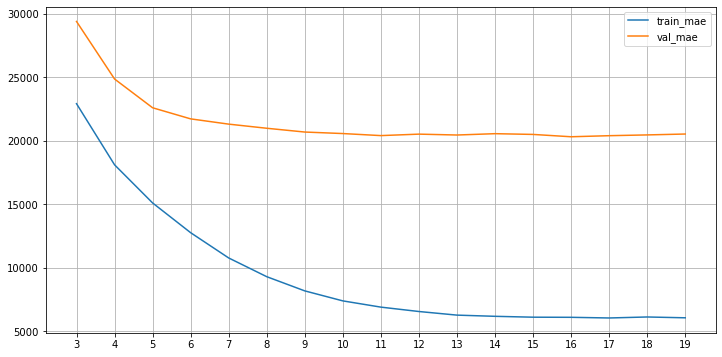

In [88]:
plt.figure(figsize = (12, 6))
plt.plot(depth, train_mae, label = 'train_mae')
plt.plot(depth, val_mae, label = 'val_mae')
plt.legend()
plt.xticks(range(3, 20))
plt.grid()
plt.show()
# 3~5 정도가 적당, 이후부터는 과적합으로 판단

### 튜닝2

In [89]:
param = {'max_depth':range(1, 6),  # 5 기준으로 앞뒤 2~3개
         'n_estimators':range(1,121,10)}

rf_r = RandomForestRegressor(max_depth=3, random_state=2022)

rf_g = GridSearchCV(rf_r,
                    param,
                    cv=10,
                    n_jobs=-1)

In [90]:
rf_g.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=3, random_state=2022),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 6),
                         'n_estimators': range(1, 121, 10)})

In [91]:
print('최적 파라미터:', rf_g.best_params_)
print('최고 성능:', rf_g.best_score_)

최적 파라미터: {'max_depth': 5, 'n_estimators': 31}
최고 성능: 0.8601870705536273


In [92]:
# 선언
rf_t = RandomForestRegressor(max_depth=5,
                             n_estimators=31,
                             random_state=2022)

In [93]:
rf_t.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=31, random_state=2022)

In [94]:
# 예측
rf_t_pred = rf_t.predict(x_val)

In [95]:
# 평가
print('MSE:', mean_squared_error(y_val, rf_t_pred))
print('R2-score:', r2_score(y_val, rf_t_pred))

MSE: 1233559902.8113222
R2-score: 0.84954653170307


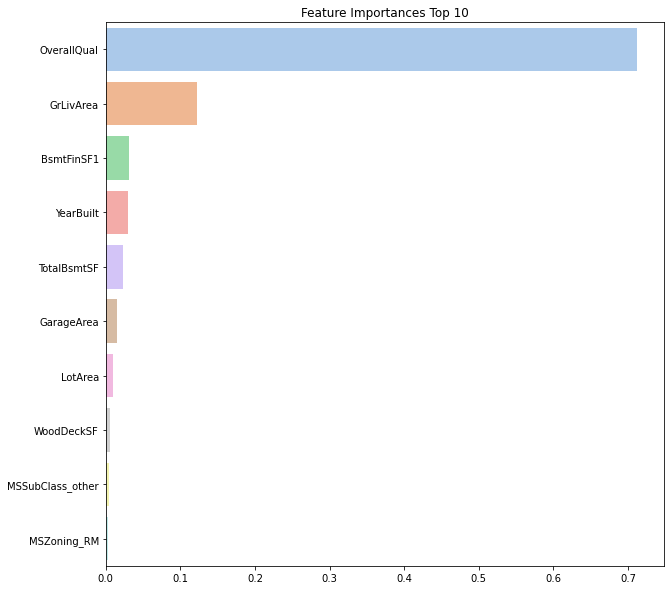

In [96]:
# 변수 중요도 시각화
feature_importance_values = rf_t.feature_importances_

# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=x_train.columns)

# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=[10, 10])
plt.title('Feature Importances Top 10')
sns.barplot(x=feature_top20, y=feature_top20.index, palette=sns.color_palette("pastel"))
plt.show()

In [97]:
# 결과저장
result_mse['RandomForest'] = mean_squared_error(y_val, rf_t_pred)
result_r2['RandomForest'] = r2_score(y_val, rf_t_pred)

## XGBoost

In [98]:
# 선언하기
xgb = XGBRegressor(random_state=2022)

In [99]:
# 학습하기
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=2022,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
# 예측하기
xgb_pred = xgb.predict(x_val)

In [101]:
# 평가하기
print('MSE:',mean_squared_error(y_val, xgb_pred))
print('R2-score:',r2_score(y_val, xgb_pred))

MSE: 918826055.6230098
R2-score: 0.8879336410700323


### 튜닝

In [102]:
param = {'max_depth':range(3,51),
         'n_estimators':range(1,121,10)}

xgb_r = RandomizedSearchCV(xgb, param, cv=10, scoring='r2')

xgb_r.fit(x_train, y_train)
xgb_r_pred = xgb_r.predict(x_val)

print('MSE:', mean_squared_error(y_val, xgb_r_pred))
print('R2-score:', r2_score(y_val, xgb_r_pred))
print('최적 파라미터:',xgb_r.best_params_)
print('최고 성능:',xgb_r.best_score_)

MSE: 935670468.4886634
R2-score: 0.8858791803735657
최적 파라미터: {'n_estimators': 31, 'max_depth': 5}
최고 성능: 0.8775916857980308


In [103]:
param = {'max_depth':range(3, 8),
         'n_estimators':range(70, 110, 5)}

xgb_t = GridSearchCV(xgb, param, cv=10, n_jobs=-1)

xgb_t.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=2022, reg_alpha=0,
                                    reg_lambda=1, scale_pos_weight=1,
                                    subsample=1, tree_method='exact',


In [104]:
print('최적 파라미터:', xgb_t.best_params_)
print('최고 성능:', xgb_t.best_score_)

최적 파라미터: {'max_depth': 3, 'n_estimators': 75}
최고 성능: 0.888905831881227


### 튜닝 후 모델선언

In [248]:
# 선언
# xgb = XGBRegressor(max_depth=3, n_estimators=75, random_state=2022)
xgb = XGBRegressor(max_depth=3, random_state=2022)

In [253]:
x_val.shape

(237, 220)

In [250]:
# 학습
xgb.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_val, y_val)], early_stopping_rounds=20)

[23:19:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:138576.96875	validation_1-rmse:149160.60938
[1]	validation_0-rmse:100401.91406	validation_1-rmse:111611.85938
[2]	validation_0-rmse:73974.32812	validation_1-rmse:86071.75000
[3]	validation_0-rmse:55809.96875	validation_1-rmse:68274.90625
[4]	validation_0-rmse:43238.04297	validation_1-rmse:55765.99219
[5]	validation_0-rmse:34856.42578	validation_1-rmse:47473.87500
[6]	validation_0-rmse:29319.75391	validation_1-rmse:42734.38672
[7]	validation_0-rmse:25688.01953	validation_1-rmse:38490.34375
[8]	validation_0-rmse:23285.11914	validation_1-rmse:36

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=20,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=2022,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

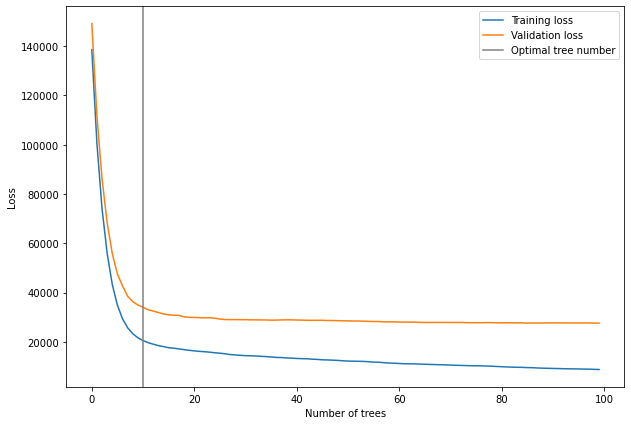

In [251]:
xgb_results = xgb.evals_result()

plt.figure(figsize=(10,7))
plt.plot(xgb_results["validation_0"]["rmse"], label="Training loss")
plt.plot(xgb_results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(10, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

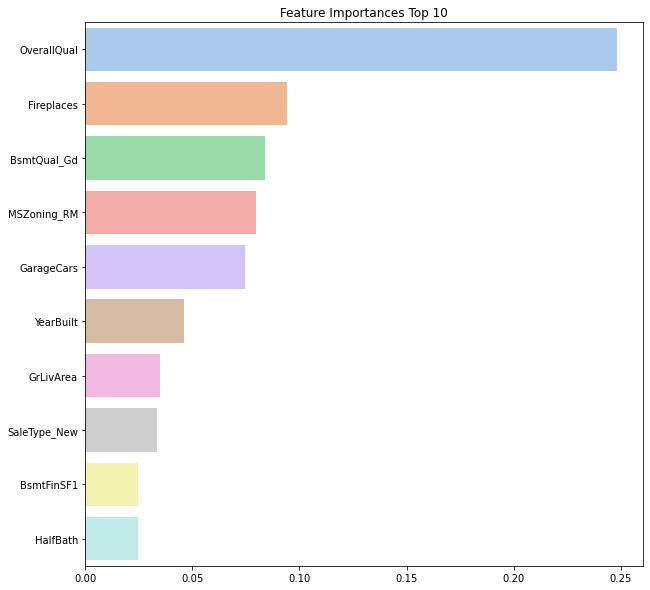

In [107]:
# 변수 중요도 시각화
feature_importance_values = xgb.feature_importances_

# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=x_train.columns)

# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=[10, 10])
plt.title('Feature Importances Top 10')
sns.barplot(x=feature_top20, y=feature_top20.index, palette = sns.color_palette("pastel"))
plt.show()

In [108]:
# 예측
xgb_pred = xgb.predict(x_val)

In [109]:
# 평가
print('MSE:', mean_squared_error(y_val, xgb_pred))
print('R2-score:', r2_score(y_val, xgb_pred))

MSE: 771292539.6196232
R2-score: 0.9059278455850807


In [110]:
# 결과저장
result_mse['XGBRegressor'] = mean_squared_error(y_val, xgb_pred)
result_r2['XGBRegressor'] = r2_score(y_val, xgb_pred)

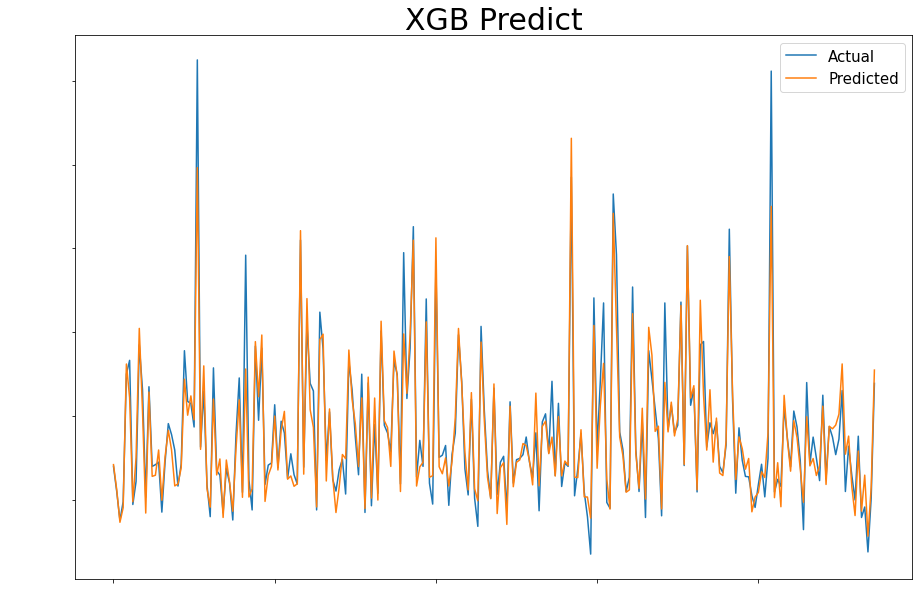

In [233]:
# 예측값, 실제값 시각화
plt.figure(figsize=(15, 10))
plt.plot(y_val.values, label='Actual')
plt.plot(xgb_pred, label='Predicted')
plt.legend(fontsize=15)
plt.title('XGB Predict', fontdict = {'fontsize': 30})
plt.xticks(color='w') 
plt.yticks(color='w') 
plt.ylabel('SalePrice', color='w', size=20)
plt.show()

## Deep Learning Model

In [111]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [112]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model  # 시각화

### shape 확인

In [113]:
# shape 확인
x_train.shape, y_train.shape

((946, 220), (946, 1))

### DL1

In [114]:
## 모델링 - Functional API
# 세션 클리어
clear_session()

# 체인처럼 레이어 연결
il = Input(shape=(220,), name='input_layer')
# 51에 제일 인접한 2의 제곱수 32를 노드 수로 선택
hl = Dense(256, activation='relu', name='hidden_layer1')(il)
hl = Dense(256, activation='relu', name='hidden_layer2')(hl)
hl = Dense(128, activation='relu', name='hidden_layer3')(hl)
hl = Dense(128, activation='relu', name='hidden_layer4')(hl)
hl = Dense(64, activation='relu', name='hidden_layer5')(hl)
hl = Dense(64, activation='relu', name='hidden_layer6')(hl)
hl = Dense(32, activation='relu', name='hidden_layer7')(hl)
hl = Dense(32, activation='relu', name='hidden_layer8')(hl)
hl = Dense(16, activation='relu', name='hidden_layer9')(hl)
ol = Dense(1, name='output_layer')(hl)

# 모델선언(시작과 끝 지정)
dl1 = Model(il, ol)

# 컴파일
dl1.compile(loss=keras.losses.mean_squared_error,
             optimizer=Adam(learning_rate=0.01))

# 모델요약
dl1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 220)]             0         
                                                                 
 hidden_layer1 (Dense)       (None, 256)               56576     
                                                                 
 hidden_layer2 (Dense)       (None, 256)               65792     
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 hidden_layer4 (Dense)       (None, 128)               16512     
                                                                 
 hidden_layer5 (Dense)       (None, 64)                8256      
                                                                 
 hidden_layer6 (Dense)       (None, 64)                4160  

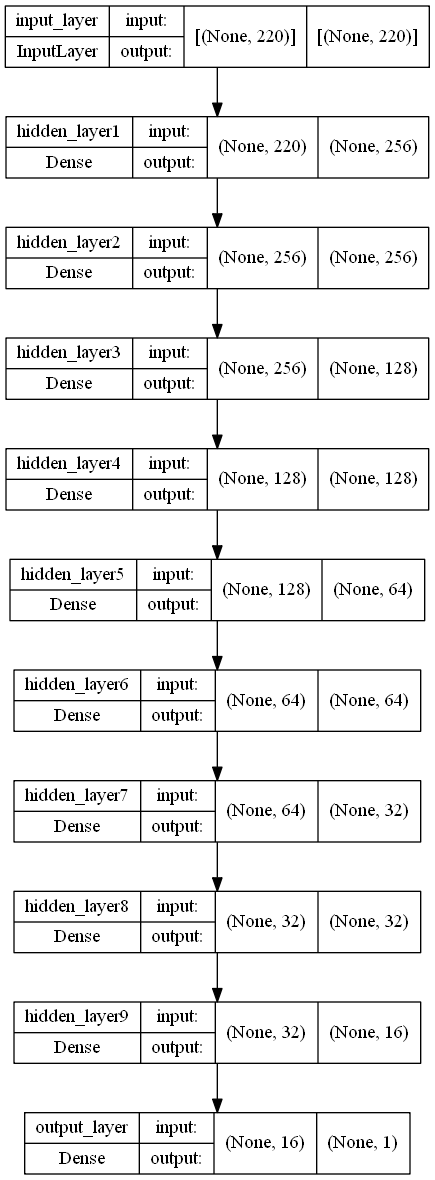

In [115]:
# 시각화
plot_model(dl1, show_shapes=True)

In [116]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)

In [117]:
# dl1 학습하기
dl1.fit(x_train, y_train, validation_split=0.2, epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
24/24 [==============================] - 1s 19ms/step - loss: 24619798528.0000 - val_loss: 9276155904.0000
Epoch 2/1000
24/24 [==============================] - 0s 5ms/step - loss: 10540754944.0000 - val_loss: 2744931840.0000
Epoch 3/1000
24/24 [==============================] - 0s 5ms/step - loss: 3112944384.0000 - val_loss: 2097720576.0000
Epoch 4/1000
24/24 [==============================] - 0s 5ms/step - loss: 2076131200.0000 - val_loss: 1819374336.0000
Epoch 5/1000
24/24 [==============================] - 0s 5ms/step - loss: 2182476288.0000 - val_loss: 1591076608.0000
Epoch 6/1000
24/24 [==============================] - 0s 4ms/step - loss: 1796904832.0000 - val_loss: 1261874176.0000
Epoch 7/1000
24/24 [==============================] - 0s 4ms/step - loss: 1730857728.0000 - val_loss: 1802704640.0000
Epoch 8/1000
24/24 [==============================] - 0s 4ms/step - loss: 1883209088.0000 - val_loss: 1923320576.0000
Epoch 9/1000
24/24 [==============================] -

In [118]:
# dl1 예측하기
dl1_pred = dl1.predict(x_val)

In [119]:
# dl1 평가하기  # cf) dropout 쓰면 성능 더 낮아짐
print('MSE:', mean_squared_error(y_val, dl1_pred))
print('R2:', r2_score(y_val, dl1_pred))

MSE: 1486584420.5506623
R2: 0.8186859174991853


In [120]:
# 결과저장
result_mse['dl1'] = mean_squared_error(y_val, dl1_pred)
result_r2['dl1'] = r2_score(y_val, dl1_pred)

### DL2

In [121]:
## Functional API
# 세션 클리어
clear_session()

# 모델의 레이어를 엮기
il = Input(shape=(220,), name='input_layer')
hl = Dense(512, activation='relu', name='hidden_layer1')(il)
hl = Dense(256, activation='relu', name='hidden_layer2')(hl)
hl = Dense(128, activation='relu', name='hidden_layer3')(hl)
hl = Dense(64, activation='relu', name='hidden_layer4')(hl)
hl = Dense(64, activation='relu', name='hidden_layer5')(hl)
hl = Dense(32, activation='relu', name='hidden_layer6')(hl)
hl = Dense(32, activation='relu', name='hidden_layer7')(hl)
hl = Dense(16, activation='relu', name='hidden_layer8')(hl)
ol = Dense(1, name='output_layer')(hl)

# 모델의 처음과 끝 지정
dl2 = Model(il, ol)

# 컴파일
dl2.compile(loss='mse', optimizer = 'adam')

# 요약
dl2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 220)]             0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               113152    
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 hidden_layer4 (Dense)       (None, 64)                8256      
                                                                 
 hidden_layer5 (Dense)       (None, 64)                4160      
                                                                 
 hidden_layer6 (Dense)       (None, 32)                2080  

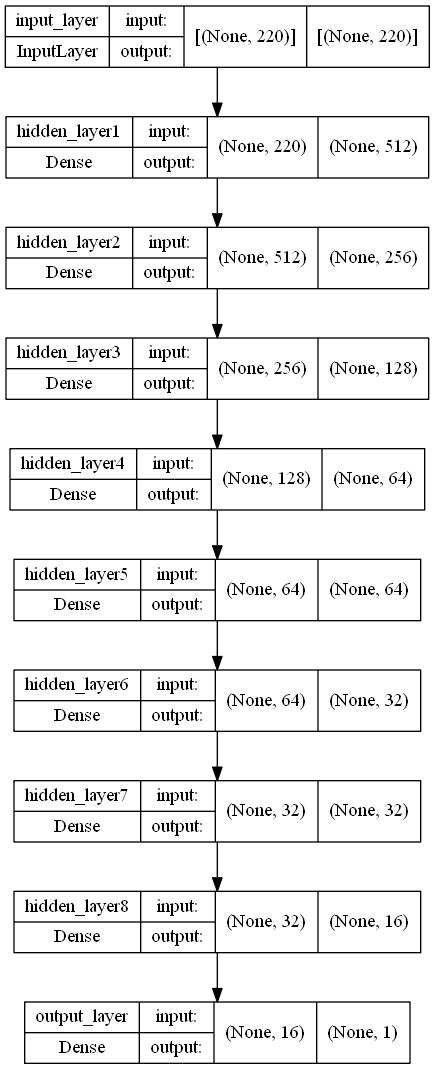

In [122]:
# 시각화

plot_model(dl2, show_shapes=True, show_layer_names=True)

In [123]:
# 학습
dl2.fit(x_train, y_train,  epochs=1000, verbose=1, validation_split=0.15, callbacks=[es])

Epoch 1/1000
26/26 [==============================] - 1s 15ms/step - loss: 27747063808.0000 - val_loss: 5190673920.0000
Epoch 2/1000
26/26 [==============================] - 0s 5ms/step - loss: 6054921728.0000 - val_loss: 4536977408.0000
Epoch 3/1000
26/26 [==============================] - 0s 5ms/step - loss: 3508568576.0000 - val_loss: 3246966016.0000
Epoch 4/1000
26/26 [==============================] - 0s 5ms/step - loss: 2889139968.0000 - val_loss: 2612527360.0000
Epoch 5/1000
26/26 [==============================] - 0s 5ms/step - loss: 2226723584.0000 - val_loss: 2458072576.0000
Epoch 6/1000
26/26 [==============================] - 0s 5ms/step - loss: 2058490112.0000 - val_loss: 2180519424.0000
Epoch 7/1000
26/26 [==============================] - 0s 4ms/step - loss: 1909870464.0000 - val_loss: 1792812928.0000
Epoch 8/1000
26/26 [==============================] - 0s 4ms/step - loss: 1799192192.0000 - val_loss: 1650979328.0000
Epoch 9/1000
26/26 [==============================] - 

In [124]:
# 예측하기
dl2_pred = dl2.predict(x_val)

In [125]:
print('MSE:', mean_squared_error(y_val, dl2_pred))
print('R2:', r2_score(y_val, dl2_pred))

MSE: 936886479.5646172
R2: 0.885730867281151


In [126]:
# 결과저장
result_mse['dl2'] = mean_squared_error(y_val, dl2_pred)
result_r2['dl2'] = r2_score(y_val, dl2_pred)

## Locally Connected DL

### DL3

In [127]:
# 세션 클리어
clear_session()

# 체인처럼 레이어 연결
il = Input(shape=(220,), name='input_layer')
hl = Dense(128, activation='relu', name='hidden_layer1')(il)
hl = Dense(128, activation='relu', name='hidden_layer2')(hl)
hl = Dense(128, activation='relu', name='hidden_layer3')(hl)
hl = Dense(128, activation='relu', name='hidden_layer4')(hl)
hl = Dense(128, activation='relu', name='hidden_layer5')(hl)
ol = Dense(1, name='output_layer')(hl)

# 모델선언(시작과 끝 지정)
dl3 = Model(il, ol)

# 컴파일
dl3.compile(loss = 'mse', optimizer=Adam())

# 모델요약
dl3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 220)]             0         
                                                                 
 hidden_layer1 (Dense)       (None, 128)               28288     
                                                                 
 hidden_layer2 (Dense)       (None, 128)               16512     
                                                                 
 hidden_layer3 (Dense)       (None, 128)               16512     
                                                                 
 hidden_layer4 (Dense)       (None, 128)               16512     
                                                                 
 hidden_layer5 (Dense)       (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 1)                 129   

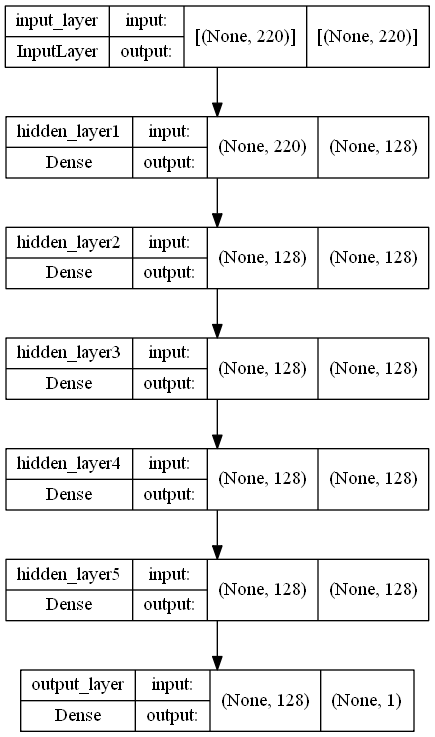

In [128]:
# 시각화
plot_model(dl3, show_shapes=True)

In [129]:
dl3.fit(x_train, y_train, validation_split=0.2,
          epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
24/24 [==============================] - 1s 13ms/step - loss: 30749751296.0000 - val_loss: 13984941056.0000
Epoch 2/1000
24/24 [==============================] - 0s 4ms/step - loss: 8170889728.0000 - val_loss: 5751725056.0000
Epoch 3/1000
24/24 [==============================] - 0s 4ms/step - loss: 4749362176.0000 - val_loss: 3848537344.0000
Epoch 4/1000
24/24 [==============================] - 0s 4ms/step - loss: 3212990208.0000 - val_loss: 2736706816.0000
Epoch 5/1000
24/24 [==============================] - 0s 4ms/step - loss: 2555685120.0000 - val_loss: 2308442624.0000
Epoch 6/1000
24/24 [==============================] - 0s 4ms/step - loss: 2295318272.0000 - val_loss: 2099826048.0000
Epoch 7/1000
24/24 [==============================] - 0s 4ms/step - loss: 2168843520.0000 - val_loss: 1974617472.0000
Epoch 8/1000
24/24 [==============================] - 0s 4ms/step - loss: 1997714816.0000 - val_loss: 1766729600.0000
Epoch 9/1000
24/24 [==============================] -

In [130]:
# 예측하기
dl3_pred = dl3.predict(x_val)

In [131]:
# 평가하기
print('MSE :' , mean_squared_error(y_val, dl3_pred))
print('R2_score :' , r2_score(y_val, dl3_pred))

MSE : 1126888953.2548685
R2_score : 0.8625568559611131


In [132]:
# 결과저장
result_mse['dl3'] = mean_squared_error(y_val, dl3_pred)
result_r2['dl3'] = r2_score(y_val, dl3_pred)

### DL4
**기준**
- A) 지상&주방&난방(벽난로)&풀&울타리 (피트, 개수)
- B) 지하&차고 (피트, 개수)
- C) 자재 및 상태(퀄리티), 유형(형태)
- D) 날짜, 평탄도, 부지구성, 위치

In [133]:
A = ['LandContour_HLS','LandContour_Low','LandContour_Lvl',
'Condition1_nag','Condition1_pos',
'LotFrontage', 'LotArea', 'MasVnrArea', 'GrLivArea', 'FullBath',
'HalfBath', 'BedroomAbvGr','WoodDeckSF','OpenPorchSF','EnclosedPorch',
'ScreenPorch','Fireplaces', 'Heating_GasW','Heating_Grav',
'Heating_OthW','Heating_Wall','HeatingQC_Fa','HeatingQC_Gd',
'HeatingQC_Po','HeatingQC_TA','CentralAir_Y','Electrical_FuseF',
'Electrical_FuseP','Electrical_Mix','Electrical_SBrkr','KitchenAbvGr_2개 이상',
'KitchenQual_Fa','KitchenQual_Gd','KitchenQual_TA',
'TotRmsAbvGrd_5~8','TotRmsAbvGrd_9~',
'FireplaceQu_Fa','FireplaceQu_Gd','FireplaceQu_No','FireplaceQu_Po',
'FireplaceQu_TA','PoolQC_Gd','PoolQC_NO','Fence_GdWo','Fence_MnPrv',
'Fence_MnWw','Fence_NO','WoodDeckSF_cut_200미만','WoodDeckSF_cut_200이상',
'OpenPorchSF_cut_100미만','OpenPorchSF_cut_100이상',
'EnclosedPorch_cut_100미만','EnclosedPorch_cut_200미만',
'EnclosedPorch_cut_300미만','EnclosedPorch_cut_300이상']

In [134]:
B = ['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
'GarageCars','GarageArea', 'LotShape_reg', 
'BsmtQual_Fa','BsmtQual_Gd','BsmtQual_Na','BsmtQual_TA',
'BsmtCond_Gd','BsmtCond_Na','BsmtCond_Po','BsmtCond_TA','BsmtExposure_Gd',
'BsmtExposure_Mn','BsmtExposure_Na','BsmtExposure_No','BsmtFinType1_BLQ',
'BsmtFinType1_GLQ','BsmtFinType1_LwQ','BsmtFinType1_NA','BsmtFinType1_Rec',
'BsmtFinType1_Unf','BsmtFinType2_BLQ','BsmtFinType2_GLQ','BsmtFinType2_LwQ',
'BsmtFinType2_NA','BsmtFinType2_Rec','BsmtFinType2_Unf',
'GarageType_Dt','GarageType_No','GarageType_Others',
'GarageFinish_No','GarageFinish_RFn','GarageFinish_Unf',
'GarageQual_Fa','GarageQual_Gd','GarageQual_No','GarageQual_Po',
'GarageQual_TA','GarageCond_No','GarageCond_Po','GarageCond_TA',
'BsmtFinSF1_grp_500미만','BsmtFinSF1_grp_1000미만','BsmtFinSF1_grp_1500미만',
'BsmtFinSF1_grp_1500이상','BsmtUnfSF_grp_500미만',
'BsmtUnfSF_grp_1000미만','BsmtUnfSF_grp_1500미만',
'BsmtUnfSF_grp_2000미만','BsmtUnfSF_grp_2000이상']

In [135]:
C = ['MSZoning_FV','MSZoning_RH','MSZoning_RL','MSZoning_RM',
'Functional_Min','Functional_Typ',
'OverallQual', 'MSSubClass_older','MSSubClass_other','MSSubClass_split',
'MSSubClass_unf', 'Exterior1st_HdBoard','Exterior1st_MetalSd','Exterior1st_Panull',
'Exterior1st_Shn','Exterior1st_Stucco','Exterior1st_VinylSd','Exterior1st_Wood',
'Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Panull','Exterior2nd_Shn',
'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wood','MasVnrType_BrkFace',
'MasVnrType_None','MasVnrType_Stone','ExterQual_Fa','ExterQual_Gd','ExterQual_TA',
'ExterCond_Fa','ExterCond_Gd','ExterCond_Po','ExterCond_TA','Foundation_CBlock',
'Foundation_PConc','Foundation_Slab','Foundation_Stone','Foundation_Wood',
'PavedDrive_P','PavedDrive_Y','SaleType_CWD','SaleType_Con','SaleType_ConLD',
'SaleType_ConLI','SaleType_ConLw','SaleType_New','SaleType_Oth','SaleType_WD',
'SaleCondition_AdjLand','SaleCondition_Alloca','SaleCondition_Family',
'SaleCondition_Normal','SaleCondition_Partial']

In [136]:
D = ['YearBuilt','LotConfig_CulDSac','LotConfig_FR2','LotConfig_FR3',
'LotConfig_Inside','Neighborhood_Blueste','Neighborhood_BrDale',
'Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_CollgCr',
'Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert',
'Neighborhood_IDOTRR','Neighborhood_MeadowV','Neighborhood_Mitchel',
'Neighborhood_NAmes','Neighborhood_NPkVill','Neighborhood_NWAmes',
'Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown',
'Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW',
'Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber',
'Neighborhood_Veenker','GarageYrBlt_1900년대','GarageYrBlt_1910년대',
'GarageYrBlt_1920년대','GarageYrBlt_1930년대','GarageYrBlt_1940년대',
'GarageYrBlt_1950년대','GarageYrBlt_1960년대','GarageYrBlt_1970년대',
'GarageYrBlt_1980년대','GarageYrBlt_1990년대','GarageYrBlt_2000년대',
'BldgType_2fmCon','BldgType_Duplex','BldgType_Twnhs','BldgType_TwnhsE',
'HouseStyle_sto2','HouseStyle_unf','RoofStyle_Hip','RoofStyle_Others',
'RoofMatl_Others','RoofMatl_Wood','YearBuilt_grp_~1950','YearBuilt_grp_~2000',
'YearBuilt_grp_2000~','YearRemodAdd_grp_~2000','YearRemodAdd_grp_2000~']

In [137]:
len(A), len(B), len(C), len(D)

(55, 55, 55, 55)

In [138]:
tr_A = x_train.loc[ : , A]
tr_B = x_train.loc[ : , B]
tr_C = x_train.loc[ : , C]
tr_D = x_train.loc[ : , D]

In [139]:
val_A = x_val.loc[ : , A]
val_B = x_val.loc[ : , B]
val_C = x_val.loc[ : , C]
val_D = x_val.loc[ : , D]

In [140]:
tr_A.shape, tr_B.shape, tr_C.shape, tr_D.shape 

((946, 55), (946, 55), (946, 55), (946, 55))

In [141]:
val_A.shape, val_B.shape, val_C.shape, val_D.shape 

((237, 55), (237, 55), (237, 55), (237, 55))

In [142]:
x_train.shape, y_train.shape

((946, 220), (946, 1))

In [143]:
## 모델링
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기 : input 2개!
il_A = Input(shape=(55,) )
hl_A = Dense(12, activation='relu')(il_A)

il_B = Input(shape=(55,) )
hl_B = Dense(12, activation='relu')(il_B)

il_C = Input(shape=(55,) )
hl_C = Dense(12, activation='relu')(il_C)

il_D = Input(shape=(55,) )
hl_D = Dense(12, activation='relu')(il_D)

add_l = Add()([hl_A, hl_B, hl_C, hl_D])

il = Input(shape=(220,) )

co_l = Concatenate()([il, add_l])
hl = Dense(220, activation='relu')(co_l)
ol = Dense(1)(hl)

# 3. 모델 시작과 끝 지정
dl4 = Model([il_A, il_B, il_C, il_D, il], ol)

# 4. 모델 컴파일
dl4.compile(optimizer=Adam(), loss='mse')

dl4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 55)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 55)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 55)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 55)]         0           []                               
                                                                                              

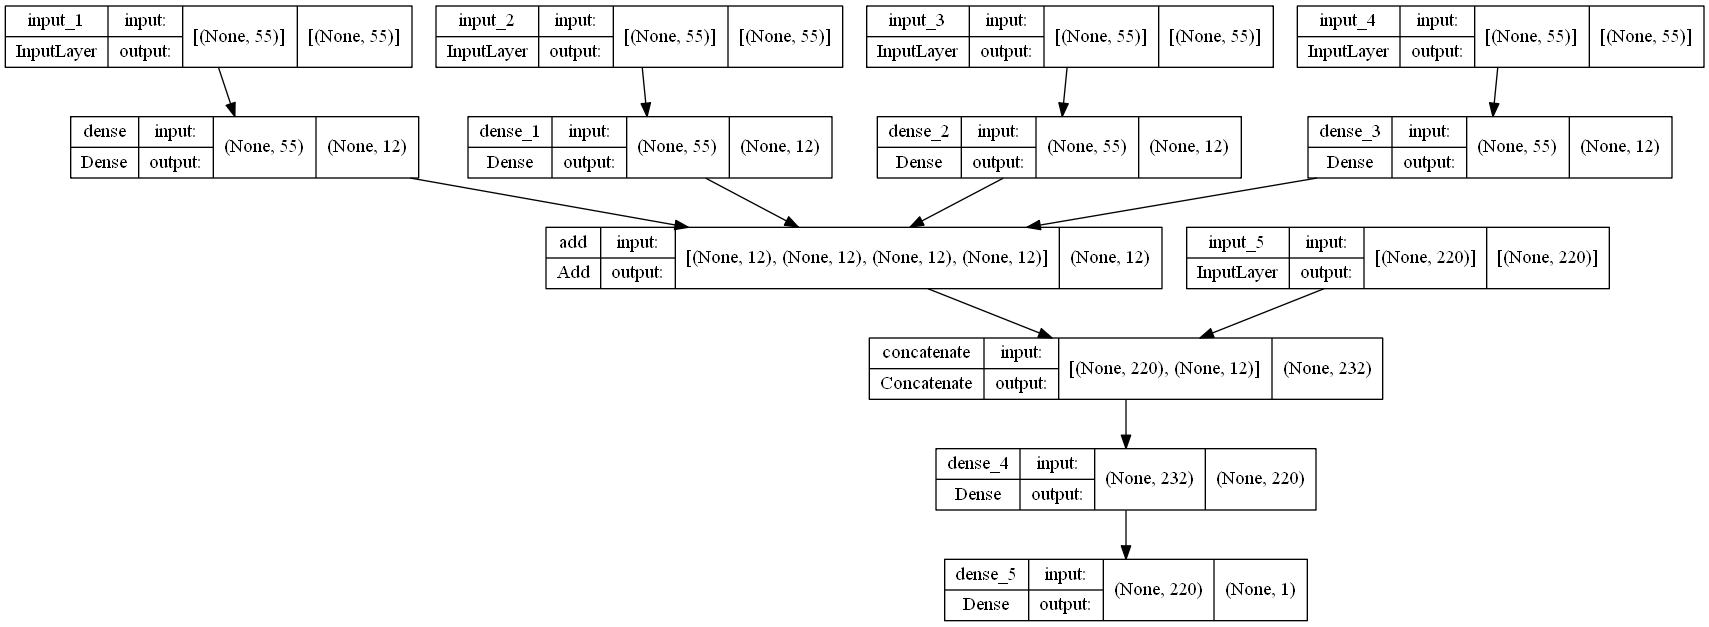

In [144]:
# 시각화
plot_model(dl4, show_shapes=True)

In [145]:
# 학습하기
dl4.fit([tr_A, tr_B, tr_C, tr_D, x_train],
          y_train, validation_split=0.3, epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
21/21 [==============================] - 1s 35ms/step - loss: 36434907136.0000 - val_loss: 35304935424.0000
Epoch 2/1000
21/21 [==============================] - 0s 5ms/step - loss: 34259138560.0000 - val_loss: 32536123392.0000
Epoch 3/1000
21/21 [==============================] - 0s 5ms/step - loss: 30552774656.0000 - val_loss: 27790370816.0000
Epoch 4/1000
21/21 [==============================] - 0s 5ms/step - loss: 24574183424.0000 - val_loss: 20947124224.0000
Epoch 5/1000
21/21 [==============================] - 0s 4ms/step - loss: 16889279488.0000 - val_loss: 13018908672.0000
Epoch 6/1000
21/21 [==============================] - 0s 4ms/step - loss: 9417167872.0000 - val_loss: 6693080576.0000
Epoch 7/1000
21/21 [==============================] - 0s 4ms/step - loss: 4762583040.0000 - val_loss: 4049461504.0000
Epoch 8/1000
21/21 [==============================] - 0s 4ms/step - loss: 3651378432.0000 - val_loss: 3638762752.0000
Epoch 9/1000
21/21 [=========================

Epoch 70/1000
21/21 [==============================] - 0s 4ms/step - loss: 1494886528.0000 - val_loss: 1472403072.0000
Epoch 71/1000
21/21 [==============================] - 0s 4ms/step - loss: 1494171264.0000 - val_loss: 1462247040.0000
Epoch 72/1000
21/21 [==============================] - 0s 4ms/step - loss: 1482051840.0000 - val_loss: 1451500928.0000
Epoch 73/1000
21/21 [==============================] - 0s 4ms/step - loss: 1473386112.0000 - val_loss: 1439761536.0000
Epoch 74/1000
21/21 [==============================] - 0s 4ms/step - loss: 1476061056.0000 - val_loss: 1429484544.0000
Epoch 75/1000
21/21 [==============================] - 0s 4ms/step - loss: 1467404416.0000 - val_loss: 1422836992.0000
Epoch 76/1000
21/21 [==============================] - 0s 4ms/step - loss: 1452401152.0000 - val_loss: 1417067904.0000
Epoch 77/1000
21/21 [==============================] - 0s 5ms/step - loss: 1442376320.0000 - val_loss: 1401569792.0000
Epoch 78/1000
21/21 [===========================

21/21 [==============================] - 0s 4ms/step - loss: 1125511168.0000 - val_loss: 1100192768.0000
Epoch 207/1000
21/21 [==============================] - 0s 4ms/step - loss: 1121743232.0000 - val_loss: 1106834560.0000
Epoch 208/1000
21/21 [==============================] - 0s 4ms/step - loss: 1124400000.0000 - val_loss: 1098132096.0000
Epoch 209/1000
21/21 [==============================] - 0s 4ms/step - loss: 1121856768.0000 - val_loss: 1098373760.0000
Epoch 210/1000
21/21 [==============================] - 0s 4ms/step - loss: 1122184064.0000 - val_loss: 1098994816.0000
Epoch 211/1000
21/21 [==============================] - 0s 5ms/step - loss: 1111392640.0000 - val_loss: 1089107584.0000
Epoch 212/1000
21/21 [==============================] - 0s 5ms/step - loss: 1118909056.0000 - val_loss: 1106195712.0000
Epoch 213/1000
21/21 [==============================] - 0s 5ms/step - loss: 1106451072.0000 - val_loss: 1086313344.0000
Epoch 214/1000
21/21 [==============================] -

21/21 [==============================] - 0s 4ms/step - loss: 873193856.0000 - val_loss: 907365248.0000
Epoch 344/1000
21/21 [==============================] - 0s 5ms/step - loss: 872022016.0000 - val_loss: 905782976.0000
Epoch 345/1000
21/21 [==============================] - 0s 4ms/step - loss: 868967744.0000 - val_loss: 902968768.0000
Epoch 346/1000
21/21 [==============================] - 0s 4ms/step - loss: 874820864.0000 - val_loss: 906007424.0000
Epoch 347/1000
21/21 [==============================] - 0s 4ms/step - loss: 872609536.0000 - val_loss: 903381376.0000
Epoch 348/1000
21/21 [==============================] - 0s 4ms/step - loss: 876129216.0000 - val_loss: 900892096.0000
Epoch 349/1000
21/21 [==============================] - 0s 5ms/step - loss: 884413248.0000 - val_loss: 914284928.0000
Epoch 350/1000
21/21 [==============================] - 0s 5ms/step - loss: 864670528.0000 - val_loss: 902017088.0000
Epoch 351/1000
21/21 [==============================] - 0s 5ms/step - l

21/21 [==============================] - 0s 4ms/step - loss: 664020672.0000 - val_loss: 753271552.0000
Epoch 482/1000
21/21 [==============================] - 0s 4ms/step - loss: 662696128.0000 - val_loss: 756169152.0000
Epoch 483/1000
21/21 [==============================] - 0s 4ms/step - loss: 664542144.0000 - val_loss: 749721280.0000
Epoch 484/1000
21/21 [==============================] - 0s 4ms/step - loss: 661599040.0000 - val_loss: 747581632.0000
Epoch 485/1000
21/21 [==============================] - 0s 4ms/step - loss: 660400960.0000 - val_loss: 758560960.0000
Epoch 486/1000
21/21 [==============================] - 0s 4ms/step - loss: 663371264.0000 - val_loss: 748300736.0000
Epoch 487/1000
21/21 [==============================] - 0s 4ms/step - loss: 664137088.0000 - val_loss: 744995776.0000
Epoch 488/1000
21/21 [==============================] - 0s 4ms/step - loss: 655345536.0000 - val_loss: 770822272.0000
Epoch 489/1000
21/21 [==============================] - 0s 4ms/step - l

21/21 [==============================] - 0s 4ms/step - loss: 531668320.0000 - val_loss: 645611840.0000
Epoch 620/1000
21/21 [==============================] - 0s 4ms/step - loss: 543820672.0000 - val_loss: 634263424.0000
Epoch 621/1000
21/21 [==============================] - 0s 4ms/step - loss: 538981824.0000 - val_loss: 634864640.0000
Epoch 622/1000
21/21 [==============================] - 0s 4ms/step - loss: 527323904.0000 - val_loss: 637260288.0000
Epoch 623/1000
21/21 [==============================] - 0s 4ms/step - loss: 533141408.0000 - val_loss: 644100416.0000
Epoch 624/1000
21/21 [==============================] - 0s 4ms/step - loss: 531078752.0000 - val_loss: 650129024.0000
Epoch 625/1000
21/21 [==============================] - 0s 4ms/step - loss: 526988736.0000 - val_loss: 629306560.0000
Epoch 626/1000
21/21 [==============================] - 0s 4ms/step - loss: 523413312.0000 - val_loss: 629016128.0000
Epoch 627/1000
21/21 [==============================] - 0s 4ms/step - l

In [146]:
# 예측하기
dl4_pred = dl4.predict([val_A, val_B, val_C, val_D, x_val])

In [147]:
# 평가하기
print('MSE:', mean_squared_error(y_val, dl4_pred))
# print('RMSE: ', math.sqrt(mean_squared_error(y_val, y_pred)))
print('R2-Score:', r2_score(y_val, dl4_pred))

MSE: 870808724.7606785
R2-Score: 0.8937901657107363


In [148]:
# 결과저장
result_mse['dl4'] = mean_squared_error(y_val, dl4_pred)
result_r2['dl4'] = r2_score(y_val, dl4_pred)

### DL5

In [149]:
# 집유형
house = ['MSSubClass_older', 'MSSubClass_other', 'MSSubClass_split', 'MSSubClass_unf',
         'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_reg',
         'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac',
         'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_2fmCon',
         'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_sto2',
         'HouseStyle_unf', 'RoofStyle_Hip', 'RoofStyle_Others', 'ExterQual_Fa',
         'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po',
         'ExterCond_TA', 'YearBuilt', 'YearBuilt_grp_~1950', 'YearBuilt_grp_~2000',
         'YearBuilt_grp_2000~', 'YearRemodAdd_grp_~2000', 'YearRemodAdd_grp_2000~',
         'PoolQC_Gd', 'PoolQC_NO', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw',
         'Fence_NO', 'OpenPorchSF_cut_100미만', 'OpenPorchSF_cut_100이상',
         'EnclosedPorch_cut_100미만', 'EnclosedPorch_cut_200미만', 'EnclosedPorch_cut_300미만',
         'EnclosedPorch_cut_300이상', 'KitchenAbvGr_2개 이상', 'KitchenQual_Fa',
         'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Fa', 'FireplaceQu_Gd',
         'FireplaceQu_No', 'FireplaceQu_Po', 'FireplaceQu_TA', 'Heating_GasW',
         'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd',
         'HeatingQC_Po', 'HeatingQC_TA', 'GrLivArea', 'BedroomAbvGr', 'Fireplaces',
         'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'CentralAir_Y', 'Electrical_FuseF',
         'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr',
         'Functional_Min', 'Functional_Typ']

# 집주변
near_h =['LotFrontage', 'LotArea', 'Condition1_nag', 'Condition1_pos',
         'PavedDrive_P', 'PavedDrive_Y']

# 집재료
mat = ['RoofMatl_Others', 'RoofMatl_Wood', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Panull', 'Exterior1st_Shn', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'Exterior1st_Wood', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Panull',
       'Exterior2nd_Shn', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wood',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'OverallQual',
       'MasVnrArea', 'WoodDeckSF_cut_200미만', 'WoodDeckSF_cut_200이상', 'WoodDeckSF',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood']


# 화장실
bath = [ 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

# 지역
neigh=[ 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker']

# 지하실
bsmt=['BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_Na', 'BsmtQual_TA', 'BsmtCond_Gd',
      'BsmtCond_Na', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd',
      'BsmtExposure_Mn', 'BsmtExposure_Na', 'BsmtExposure_No', 'BsmtFinType1_BLQ',
      'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_NA', 'BsmtFinType1_Rec',
      'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ',
      'BsmtFinType2_NA', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'BsmtFinSF1_grp_500미만',
      'BsmtFinSF1_grp_1000미만', 'BsmtFinSF1_grp_1500미만', 'BsmtFinSF1_grp_1500이상',
      'BsmtUnfSF_grp_500미만', 'BsmtUnfSF_grp_1000미만', 'BsmtUnfSF_grp_1500미만',
      'BsmtUnfSF_grp_2000미만', 'BsmtUnfSF_grp_2000이상', 'BsmtFinSF1', 'BsmtUnfSF',
      'TotalBsmtSF', 'TotRmsAbvGrd_5~8', 'TotRmsAbvGrd_9~']

# 차고
gar=['GarageType_Dt', 'GarageType_No', 'GarageType_Others', 'GarageYrBlt_1900년대',
     'GarageYrBlt_1910년대', 'GarageYrBlt_1920년대', 'GarageYrBlt_1930년대',
     'GarageYrBlt_1940년대', 'GarageYrBlt_1950년대', 'GarageYrBlt_1960년대',
     'GarageYrBlt_1970년대', 'GarageYrBlt_1980년대', 'GarageYrBlt_1990년대',
     'GarageYrBlt_2000년대', 'GarageFinish_No', 'GarageFinish_RFn',
     'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_No',
     'GarageQual_Po', 'GarageQual_TA', 'GarageCond_No', 'GarageCond_Po',
     'GarageCond_TA', 'GarageCars', 'GarageArea']

# 판매관련
sale=['SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
      'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
      'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
      'SaleCondition_Partial']


In [150]:
# 집 내부 요인
# house : 집 스타일, 집 건설연도, 집 옵션 등 집의 유형이나 옵션 관련을 묶음
tr_x_house= x_train.loc[:,house ]
# mat : 집 재료를 묶음
tr_x_mat= x_train.loc[:,mat ]
# bath : 화장실 관련 묶음
tr_x_bath= x_train.loc[:,bath ]
# bsmt : 지하실 관련 묶음
tr_x_bsmt= x_train.loc[:,bsmt ]
# gar : 차고를 묶음
tr_x_gar= x_train.loc[:,gar ]

# 집 외부 요인
# nearh : 집 주변 상태를 묶음
tr_x_nearh= x_train.loc[:,near_h ]
# neigh : 지역을 묶음
tr_x_neigh= x_train.loc[:,neigh ]
# sale : 판매관련을 묶음
tr_x_sale= x_train.loc[:,sale ]

In [151]:
# 집 내부 요인
# house : 집 스타일, 집 건설연도, 집 옵션 등 집의 유형이나 옵션 관련을 묶음
val_x_house= x_val.loc[:,house ]
# mat : 집 재료를 묶음
val_x_mat= x_val.loc[:,mat ]
# bath : 화장실 관련 묶음
val_x_bath= x_val.loc[:,bath ]
# bsmt : 지하실 관련 묶음
val_x_bsmt= x_val.loc[:,bsmt ]
# gar : 차고를 묶음
val_x_gar= x_val.loc[:,gar ]

# 집 외부 요인
# nearh : 집 주변 상태를 묶음
val_x_nearh= x_val.loc[:,near_h ]
# neigh : 지역을 묶음
val_x_neigh= x_val.loc[:,neigh ]
# sale : 판매관련을 묶음
val_x_sale= x_val.loc[:,sale ]

### shape 확인

In [152]:
tr_x_house.shape, tr_x_mat.shape, tr_x_bath.shape, tr_x_bsmt.shape, tr_x_gar.shape, tr_x_nearh.shape, tr_x_neigh.shape,  tr_x_sale.shape

((946, 79),
 (946, 29),
 (946, 4),
 (946, 38),
 (946, 27),
 (946, 6),
 (946, 24),
 (946, 13))

x_train, x_val, y_train, y_val

In [153]:
val_x_house.shape, val_x_mat.shape, val_x_bath.shape, val_x_bsmt.shape, val_x_gar.shape, val_x_nearh.shape, val_x_neigh.shape,  val_x_sale.shape

((237, 79),
 (237, 29),
 (237, 4),
 (237, 38),
 (237, 27),
 (237, 6),
 (237, 24),
 (237, 13))

In [154]:
## 모델링 - Functional API
# 세션 클리어
clear_session()

# 체인처럼 레이어 연결
il_house = Input(shape=(79,), name='input_house')
hl_house = Dense(128, activation='relu')(il_house)

il_mat = Input(shape=(29,), name='input_mat')
hl_mat = Dense(128, activation='relu')(il_mat)

il_bath = Input(shape=(4,), name='input_bath')
hl_bath = Dense(128, activation='relu')(il_bath)

il_bsmt = Input(shape=(38,), name='input_bsmt')
hl_bsmt = Dense(128, activation='relu')(il_bsmt)

il_gar = Input(shape=(27,), name='input_gar')
hl_gar = Dense(128, activation='relu')(il_gar)

il_nearh = Input(shape=(6,), name='input_nearh')
hl_nearh = Dense(128, activation='relu')(il_nearh)

il_neigh = Input(shape=(24,), name='input_neigh')
hl_neigh = Dense(128, activation='relu')(il_neigh)

il_sale = Input(shape=(13,), name='input_sale')
hl_sale = Dense(128, activation='relu')(il_sale)

# hidden layer add : 내부요인과 외부요인으로 구분하여 묶고자 함.
add_1 = Add()([hl_house,hl_mat,hl_bath,hl_bsmt,hl_gar])
add_2 = Add()([hl_nearh,hl_neigh,hl_sale])

# add끼리 연결
cl = Concatenate()([add_1,add_2])
hl = Dense(64, activation='relu')(cl)
hl = Dense(32, activation='relu')(hl)
ol = Dense(1)(hl)

# 모델선언(시작과 끝 지정)
dl5 = Model([il_house,il_mat,il_bath,il_bsmt,il_gar,il_nearh,il_neigh,il_sale], ol)
dl5.compile(loss='mse', optimizer=Adam())

# 5. 요약
dl5.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_house (InputLayer)       [(None, 79)]         0           []                               
                                                                                                  
 input_mat (InputLayer)         [(None, 29)]         0           []                               
                                                                                                  
 input_bath (InputLayer)        [(None, 4)]          0           []                               
                                                                                                  
 input_bsmt (InputLayer)        [(None, 38)]         0           []                               
                                                                                              

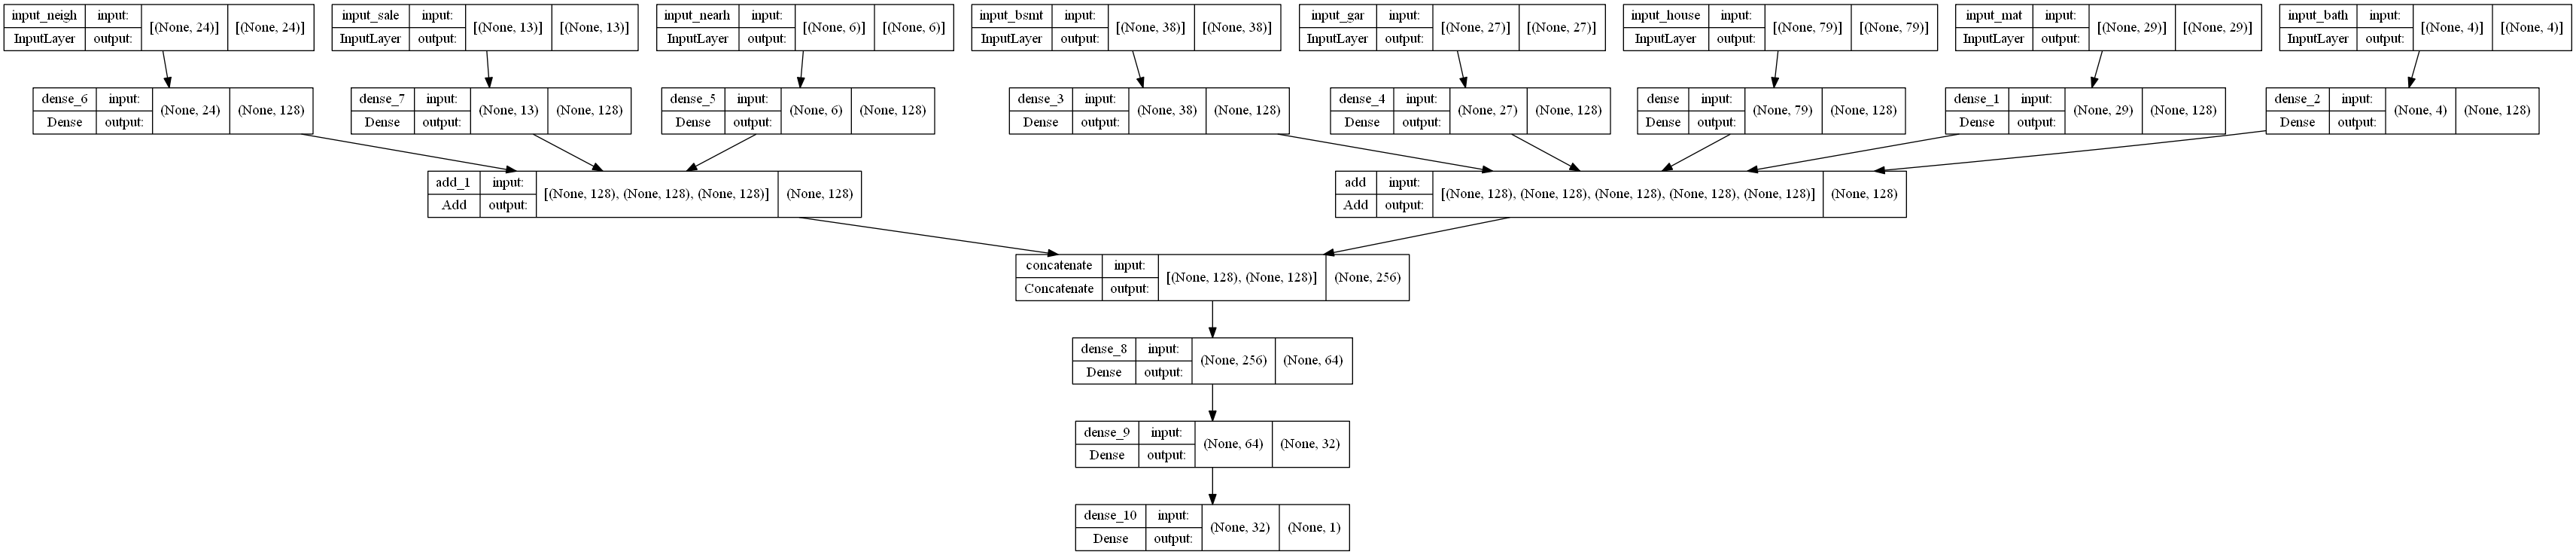

In [155]:
plot_model(dl5, show_shapes=True, show_layer_names=True)

In [156]:
# dl5 학습하기
dl5.fit([tr_x_house,tr_x_mat,tr_x_bath,tr_x_bsmt,tr_x_gar,tr_x_nearh,tr_x_neigh,tr_x_sale],
        y_train, validation_split=0.3, epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
21/21 [==============================] - 1s 31ms/step - loss: 36427767808.0000 - val_loss: 34647367680.0000
Epoch 2/1000
21/21 [==============================] - 0s 5ms/step - loss: 31878873088.0000 - val_loss: 27322308608.0000
Epoch 3/1000
21/21 [==============================] - 0s 5ms/step - loss: 20449763328.0000 - val_loss: 12034951168.0000
Epoch 4/1000
21/21 [==============================] - 0s 5ms/step - loss: 6302043136.0000 - val_loss: 4171266304.0000
Epoch 5/1000
21/21 [==============================] - 0s 5ms/step - loss: 4363846656.0000 - val_loss: 3839516160.0000
Epoch 6/1000
21/21 [==============================] - 0s 5ms/step - loss: 3830778112.0000 - val_loss: 3563860480.0000
Epoch 7/1000
21/21 [==============================] - 0s 5ms/step - loss: 3403098368.0000 - val_loss: 3308014848.0000
Epoch 8/1000
21/21 [==============================] - 0s 4ms/step - loss: 3141572864.0000 - val_loss: 3041508864.0000
Epoch 9/1000
21/21 [=============================

Epoch 70/1000
21/21 [==============================] - 0s 5ms/step - loss: 1236087168.0000 - val_loss: 1166419712.0000
Epoch 71/1000
21/21 [==============================] - 0s 5ms/step - loss: 1222968960.0000 - val_loss: 1160976128.0000
Epoch 72/1000
21/21 [==============================] - 0s 4ms/step - loss: 1225801600.0000 - val_loss: 1179239936.0000
Epoch 73/1000
21/21 [==============================] - 0s 4ms/step - loss: 1232104064.0000 - val_loss: 1184673792.0000
Epoch 74/1000
21/21 [==============================] - 0s 5ms/step - loss: 1215606784.0000 - val_loss: 1154923392.0000
Epoch 75/1000
21/21 [==============================] - 0s 4ms/step - loss: 1209748480.0000 - val_loss: 1166492800.0000
Epoch 76/1000
21/21 [==============================] - 0s 5ms/step - loss: 1202874880.0000 - val_loss: 1146955776.0000
Epoch 77/1000
21/21 [==============================] - 0s 5ms/step - loss: 1202289792.0000 - val_loss: 1150625280.0000
Epoch 78/1000
21/21 [===========================

21/21 [==============================] - 0s 4ms/step - loss: 728852096.0000 - val_loss: 778409024.0000
Epoch 208/1000
21/21 [==============================] - 0s 4ms/step - loss: 735421568.0000 - val_loss: 772826240.0000
Epoch 209/1000
21/21 [==============================] - 0s 4ms/step - loss: 724197312.0000 - val_loss: 797780800.0000
Epoch 210/1000
21/21 [==============================] - 0s 5ms/step - loss: 740680320.0000 - val_loss: 772945216.0000
Epoch 211/1000
21/21 [==============================] - 0s 4ms/step - loss: 727930304.0000 - val_loss: 767063552.0000
Epoch 212/1000
21/21 [==============================] - 0s 5ms/step - loss: 723627008.0000 - val_loss: 780615936.0000
Epoch 213/1000
21/21 [==============================] - 0s 4ms/step - loss: 723305024.0000 - val_loss: 775734976.0000
Epoch 214/1000
21/21 [==============================] - 0s 4ms/step - loss: 717626432.0000 - val_loss: 764916544.0000
Epoch 215/1000
21/21 [==============================] - 0s 5ms/step - l

In [157]:
# dl5 예측하기
dl5_pred=dl5.predict([val_x_house,val_x_mat,val_x_bath,val_x_bsmt,val_x_gar,val_x_nearh, val_x_neigh,val_x_sale])

In [158]:
# dl5 평가하기  
print('MSE:', mean_squared_error(y_val, dl5_pred))
print('R2-Score:', r2_score(y_val, dl5_pred))

MSE: 892128104.9051769
R2-Score: 0.891189907160365


In [159]:
# 결과저장
result_mse['dl5'] = mean_squared_error(y_val, dl5_pred)
result_r2['dl5'] = r2_score(y_val, dl5_pred)

# 모델 성능 비교 - MSE

In [161]:
models = []
mse = []

for k, v in result_mse.items():
    models.append(k)
    mse.append(v)

models = pd.DataFrame(models)
mse = pd.DataFrame(mse)

mse_df = pd.concat([models, mse], axis=1)
mse_df.columns = ['models', 'mse']

mse_df = mse_df.sort_values('mse', ascending=False)

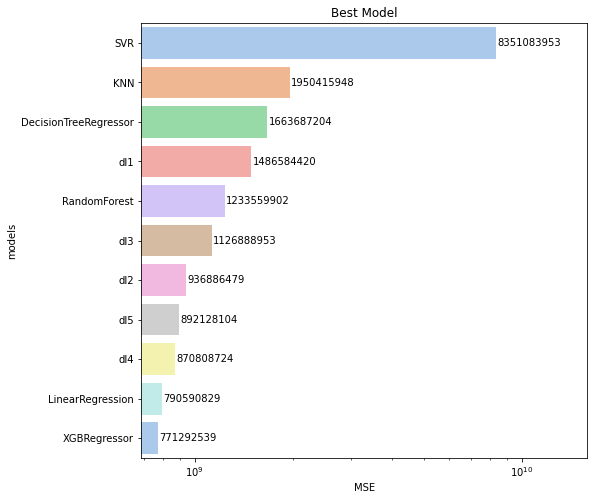

In [222]:
plt.figure(figsize=(8, 8))
plt.title('Best Model')
ax1 = sns.barplot(x=mse_df['mse'], y=mse_df['models'], palette=sns.color_palette('pastel'))
plt.xlabel('MSE')
plt.xscale('log')

for p in ax1.patches:
    x, y, width, height = p.get_bbox().bounds
    ax1.text(width*1.01, y+height/2, int(width), va='center')
ax1.set_xlim(0, 10**10.2)


plt.show()

In [163]:
models = []
r2 = []

for k, v in result_r2.items():
    models.append(k)
    r2.append(v)

models = pd.DataFrame(models)
r2 = pd.DataFrame(r2)

r2_df = pd.concat([models, r2], axis=1)
r2_df.columns = ['models', 'r2']

r2_df = r2_df.sort_values('r2', ascending=False)

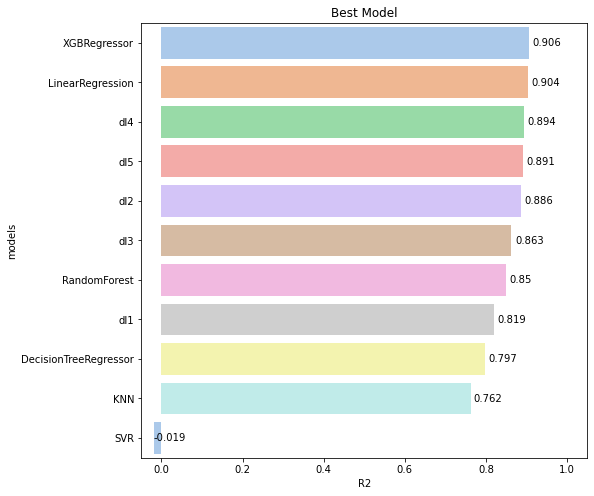

In [199]:
plt.figure(figsize=(8, 8))
plt.title('Best Model')
ax2 = sns.barplot(x=r2_df['r2'], y=r2_df['models'], palette=sns.color_palette('pastel'))
plt.xlabel('R2')
plt.xscale('linear')

for p in ax2.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, round(width, 3), va='center')
ax.set_xlim(-0.05, 1.05)

plt.show()

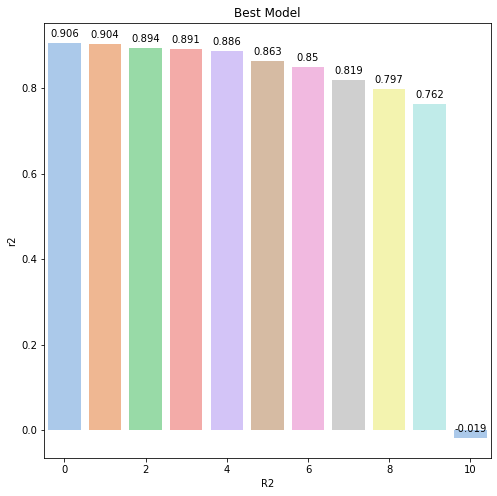

In [189]:
plt.figure(figsize=(8, 8))
plt.title('Best Model')
ax = sns.barplot(x=r2_df['models'], y=r2_df['r2'], palette=sns.color_palette('pastel'))
plt.xlabel('R2')
plt.xscale('linear')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.015, round(height, 3), ha = 'center', size = 10)

plt.show()

## 일반적인 결정계수 기준
- 일반적으로 Bio는 0.95, 공학은 0.7, 사회과학은 0.3 정도를 기준으로 한다고 함.
- Cohen이라는 학자는 아래와 같이 효과크기에 따른 결정계수의 기준을 제시함
- 보통 사회과학에서는 이중 medium의 기준인 0.13 정도를 기준으로 함<br>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb3oLge%2FbtqYZ7tNapc%2FNOqOweFGuwYS1ivGpkoZcK%2Fimg.png'><br>
출처: https://ltlkodae.tistory.com/19<br>